Madison Kremmer
ID:300523256

# **Linguistic Analysis of books banned in the USA compared to books banned across the world - sourced from Anne Lyon Heights list - 'Banned Books: Informal Notes on Some Books Banned for Various Reasons at Various Times and in Various Places'.**

# **Introduction:**
Censorship, in various forms, has persistently cast a shadow over the literary world, prompting discussions on the boundaries of free expression and the societal nuances that drive the suppression of certain works. Among the extensive catalog of banned books, those documented by the American Library Association (ALA) and Anne Lyon Haight, an esteemed American author, essayist, and collector of rare books, stand as historical markers of controversial and challenged literature. This research embarks on a linguistic exploration of banned books, using Python-based linguistic analysis techniques to delve into the distinct linguistic profiles of banned books recorded by the ALA and Anne Lyon Haight; focusing on key linguistic features such as sentiment, lexical diversity, and other relevant metrics, we endeavor to uncover patterns that may explain the reasons behind the censorship of these literary works. The comparative analysis of these linguistic profiles offers an opportunity to discern not only the shared characteristics but also the subtle divergences that may be rooted in cultural, societal, or contextual disparities.





# **Research Question:**

>How does the linguistic profile of banned books, as documented by Anne Lyon Haight and the American Library Association, differ in terms of sentiment, lexical diversity, and specific linguistic features?

Using Python, can we conduct a comparative linguistic analysis to uncover patterns and distinctions in language use across different lists of banned books, shedding light on the reasons behind their censorship and potential correlations with societal and cultural factors?"



# **Data and Description of Data:**
The data selected for this research project consists of banned books documented by the American Library Association (ALA) and Anne Lyon Haight.The texts were gathered from the Project Gutenberg website, where there is a category specifically with books banned by the ALA and Anne Lyon Haight respectively. From here I was able to select the text. file URLS, ignoring audio files. The Gutenberg collection for ALA-banned books was not as comprehensive as that for Anne Lyon Heights, with only 20 books for the ALA and 150 for Anne Heights list. I consulted the ALA's 'Banned & Challenged Books' website to look at a more comprehensive list and then searched manually for these books in Project Gutenberg.

 Due to the difficulty of finding books from the USA-banned books category that are currently available outside of copyright, I limited my sample size to 20, as this was the most comprehensive list I was able to find from Project Gutenberg. Available books from the Anne LH list of books numbered around 150. I took a random sample of 150 books - While a smaller sample size may reduce the precision of the analysis, the randomness of my sample may help mitigate selection bias. I chose to select books from the Project Gutenberg Library as it is one of the collections of books that are in the public domain or available with open access. The books available on Project Gutenberg cover a wide range of genres and include classics, literature, science, history, and more - it also contains a catergory of books from both the ALA (American Library Association) classified as banned and a category dedicated to books from Anne Lyon Heights study 'Banned Books: Informal Notes on Some Books Banned for Various Reasons at Various Times and in Various Places'. The availability of all texts as a text file was important to me as the lack of complex formatting or binary structures simplifies data handling and processing. This simplified the amount of cleaning I needed to do to structure my data.









*Results and discussion found at the end of the code cells :)*

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from string import punctuation
from nltk import collocations
import time
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Loading in URLS, text processing



> This Python script defines functions to retrieve and process text content from Project Gutenberg URLs, aiming to create corpora for analyzing banned books in the USA and from books banned in multiple locations from Anne Lyon Heights list. The get_text_from_url_with_retry function handles fetching content with retry mechanisms and removes specified lines to trim the project gutenburg legal text, so to remove words not relevent to the book. The process_text function tokenizes, removes stopwords, and performs part-of-speech tagging. Two dictionaries, USA_Banned_Books and AnneLH_Banned_Books, store book titles and corresponding Project Gutenberg URLs. The create_corpus_with_retry function utilizes the aforementioned functions to create corpora (USA_corpus and AnneLH_corpus). Each corpus contains processed text data, where book titles serve as keys and tokenized, cleaned text as values. Overall, this code streamlines the retrieval and preprocessing of text data, providing organized corpora for subsequent linguistic analysis of banned books.



In [3]:
# Request texts from url, skipping over urls that may not be accessible due to server issues.
def get_text_from_url_with_retry(url, max_retries=3, retry_delay=5, start_line=28, end_line=-398): #removing gutenburg text (first 28 lines and last 398 seem to be accurate header/footer for most books)
    for attempt in range(max_retries):
        start_time = time.time()
        try:
            response = requests.get(url, timeout=30)
            response.raise_for_status()

            if response.status_code == 200:
                # Split the text into lines
                lines = response.text.splitlines()

                # Remove the specified lines
                trimmed_lines = lines[start_line:end_line]

                # Join the remaining lines to reconstruct the trimmed text
                trimmed_text = '\n'.join(trimmed_lines)

                elapsed_time = time.time() - start_time
                print(f"Time taken for {url} (Attempt {attempt + 1}): {elapsed_time} seconds")
                return trimmed_text
            else:
                print(f"Failed to fetch content from {url}. Status code: {response.status_code}")

        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed. Retrying in {retry_delay} seconds...")
            time.sleep(retry_delay)

    print(f"Failed to fetch content from {url} after {max_retries} attempts")
    return None

def process_text(text):
    # Tokenize into sentences and then words
    sentences = sent_tokenize(text)
    tokens = [word_tokenize(sentence) for sentence in sentences]

    # Remove stopwords and punctuation, and perform part-of-speech tagging
    stop_words = set(stopwords.words('english'))
    processed_tokens = [
        [
            (word.lower(), tag) for word, tag in pos_tag(sentence)
            if word.isalpha() and word.lower() not in stop_words and word not in punctuation
        ]
        for sentence in tokens
    ]

    return processed_tokens
USA_Banned_Books = {
    "The call of the wild":"https://www.gutenberg.org/cache/epub/215/pg215.txt",
    "The Awakening, and Selected Short Stories":"https://www.gutenberg.org/cache/epub/160/pg160.txt",
    "The Jungle":"https://www.gutenberg.org/cache/epub/140/pg140.txt",
    "Little Black Sambo":"https://www.gutenberg.org/cache/epub/17824/pg17824.txt",
    "Sons and Lovers":"https://www.gutenberg.org/cache/epub/217/pg217.txt",
    "The Adventures of Tom Sawyer, Complete":"https://www.gutenberg.org/cache/epub/74/pg74.txt",
    "Adventures of Huckleberry Finn":"https://www.gutenberg.org/cache/epub/76/pg76.txt",
    "Ulysses":"https://www.gutenberg.org/cache/epub/4300/pg4300.txt",
    "Women in Love":"https://www.gutenberg.org/cache/epub/4240/pg4240.txt",
    "The King James Version of the Bible":"https://www.gutenberg.org/cache/epub/10/pg10.txt",
    "The Great Gatsby":"https://www.gutenberg.org/cache/epub/64317/pg64317.txt",
    "The Sun Also Rises":"https://www.gutenberg.org/cache/epub/67138/pg67138.txt",
    "Chaucer's Works, Volume 4 — The Canterbury Tales":"https://www.gutenberg.org/cache/epub/22120/pg22120.txt",
    "Leaves of Grass":"https://www.gutenberg.org/cache/epub/1322/pg1322.txt",
    "On the Origin of Species By Means of Natural Selection":"https://www.gutenberg.org/cache/epub/1228/pg1228.txt",
    "The Communist Manifesto":"https://www.gutenberg.org/cache/epub/61/pg61.txt",
    "The Decameron of Giovanni Boccaccio":"https://www.gutenberg.org/cache/epub/23700/pg23700.txt",
    "Memoirs of Fanny Hill":"https://www.gutenberg.org/cache/epub/25305/pg25305.txt",
    "Uncle Tom's Cabin":"https://www.gutenberg.org/cache/epub/203/pg203.txt",
    "The Fortunes and Misfortunes of the Famous Moll Flanders":"https://www.gutenberg.org/cache/epub/370/pg370.txt"



}

# URLs for non-fiction biographies/autobiographies
AnneLH_Banned_Books = {
   "The Dramas of Victor Hugo: Mary Tudor, Marion de Lorme, Esmeralda":"https://www.gutenberg.org/cache/epub/39133/pg39133.txt",
    "The Rainbow":"https://www.gutenberg.org/cache/epub/28948/pg28948.txt",
    "Νεφέλαι (The Clouds of Aristophanes)":"https://www.gutenberg.org/cache/epub/30719/pg30719.txt",
    "Life: An Explanation for Young People":"https://www.gutenberg.org/cache/epub/31732/pg31732.txt",
    "The History of the Devil, As Well Ancient as Modern: In Two Parts":"https://www.gutenberg.org/cache/epub/31053/pg31053.txt",
    "Sinister Street, vol. 2":"https://www.gutenberg.org/cache/epub/33798/pg33798.txt",
    "Poems & Ballads (First Series)":"https://www.gutenberg.org/cache/epub/35402/pg35402.txt",
    "Reigen: Zehn Dialoge":"https://www.gutenberg.org/cache/epub/37266/pg37266.txt",
    "Émile; Or, Concerning Education; Extracts":"https://www.gutenberg.org/cache/epub/30433/pg30433.txt",
    "Principles of Political Economy":"https://www.gutenberg.org/cache/epub/30107/pg30107.txt",
    "In Praise of Folly":"https://www.gutenberg.org/cache/epub/30201/pg30201.txt",
    "The Odyssey":"https://www.gutenberg.org/cache/epub/3160/pg3160.txt",
    "Three Weeks":"https://www.gutenberg.org/cache/epub/8899/pg8899.txt",
    "Richard II":"https://www.gutenberg.org/cache/epub/2250/pg2250.txt",
    "The Backwash of War":"https://www.gutenberg.org/cache/epub/26884/pg26884.txt",
    "Aphrodite: Moeurs antiques":"https://www.gutenberg.org/cache/epub/26685/pg26685.txt",
    "The Child of Pleasure":"https://www.gutenberg.org/cache/epub/20015/pg20015.txt",
    "The Temptation of St. Antony; Or, A Revelation of the Soul":"https://www.gutenberg.org/cache/epub/25053/pg25053.txt",
    "The Loom of Youth":"https://www.gutenberg.org/cache/epub/18863/pg18863.txt",
    "Le Roi s'amuse":"https://www.gutenberg.org/cache/epub/29549/pg29549.txt"

}

def create_corpus_with_retry(urls, max_retries=3, retry_delay=5):
    corpus = {}
    for title, url in urls.items():
        text = get_text_from_url_with_retry(url, max_retries, retry_delay)
        if text is not None:
            processed_text = process_text(text)
            corpus[title] = processed_text
    return corpus

USA_corpus = create_corpus_with_retry(USA_Banned_Books)
AnneLH_corpus = create_corpus_with_retry(AnneLH_Banned_Books)

Time taken for https://www.gutenberg.org/cache/epub/215/pg215.txt (Attempt 1): 0.5106797218322754 seconds
Time taken for https://www.gutenberg.org/cache/epub/160/pg160.txt (Attempt 1): 0.368274450302124 seconds
Time taken for https://www.gutenberg.org/cache/epub/140/pg140.txt (Attempt 1): 0.5061283111572266 seconds
Time taken for https://www.gutenberg.org/cache/epub/17824/pg17824.txt (Attempt 1): 0.33689427375793457 seconds
Time taken for https://www.gutenberg.org/cache/epub/217/pg217.txt (Attempt 1): 0.4545576572418213 seconds
Time taken for https://www.gutenberg.org/cache/epub/74/pg74.txt (Attempt 1): 0.36075329780578613 seconds
Time taken for https://www.gutenberg.org/cache/epub/76/pg76.txt (Attempt 1): 0.4463627338409424 seconds
Time taken for https://www.gutenberg.org/cache/epub/4300/pg4300.txt (Attempt 1): 0.5345480442047119 seconds
Time taken for https://www.gutenberg.org/cache/epub/4240/pg4240.txt (Attempt 1): 0.44469332695007324 seconds
Time taken for https://www.gutenberg.org

# Word count & Vocabulary Analysis

In [4]:
USA_Corpus_wordcount = {title: sum(len(word) for sentence in text for word, _ in sentence) for title, text in USA_corpus.items()}
AnneLH_corpus_wordcount = {title: sum(len(word) for sentence in text for word, _ in sentence) for title, text in AnneLH_corpus.items()}


In [5]:
from tabulate import tabulate

# Create a list of tuples for USA Banned Books and sort by word count
usa_table_data = sorted([(title, word_count) for title, word_count in USA_Corpus_wordcount.items()], key=lambda x: x[1])

# Create a list of tuples for Anne LH Banned Books and sort by word count
annelh_table_data = sorted([(title, word_count) for title, word_count in AnneLH_corpus_wordcount.items()], key=lambda x: x[1])

# Print the sorted table for USA Banned Books
print("\nUSA Banned Books Word Counts (Sorted):")
print(tabulate(usa_table_data, headers=["Title", "Word Count"], tablefmt="pretty"))

# Print the sorted table for Anne LH Banned Books
print("\nAnne LH Banned Books Word Counts (Sorted):")
print(tabulate(annelh_table_data, headers=["Title", "Word Count"], tablefmt="pretty"))


USA Banned Books Word Counts (Sorted):
+----------------------------------------------------------+------------+
|                          Title                           | Word Count |
+----------------------------------------------------------+------------+
|                    Little Black Sambo                    |    2949    |
|                 The Communist Manifesto                  |   40476    |
|                   The call of the wild                   |   86916    |
|                     The Great Gatsby                     |   127337   |
|                    The Sun Also Rises                    |   154351   |
|        The Awakening, and Selected Short Stories         |   175892   |
|          The Adventures of Tom Sawyer, Complete          |   179370   |
|                  Memoirs of Fanny Hill                   |   230913   |
|              Adventures of Huckleberry Finn              |   231863   |
| The Fortunes and Misfortunes of the Famous Moll Flanders |   303584   

This code segment compares the word count distribution and vocabulary richness between two corpora: the USA Banned Books corpus (USA_corpus) and the Anne LH Banned Books List corpus (AnneLH_corpus). The USA_corpus_vocabulary and AnneLH_corpus_vocabulary dictionaries are created, mapping each book title to the count of unique words (vocabulary) in the respective corpus. The code then utilizes the matplotlib library to generate two box-and-whisker plots. The first plot displays the distribution of word counts in the two corpora, with labels for each. The second plot illustrates the distribution of vocabulary richness (unique word counts) for the same corpora. These visualizations provide a comparative analysis of the textual characteristics of the banned books from the USA and Anne LH lists in terms of overall word count and vocabulary richness.

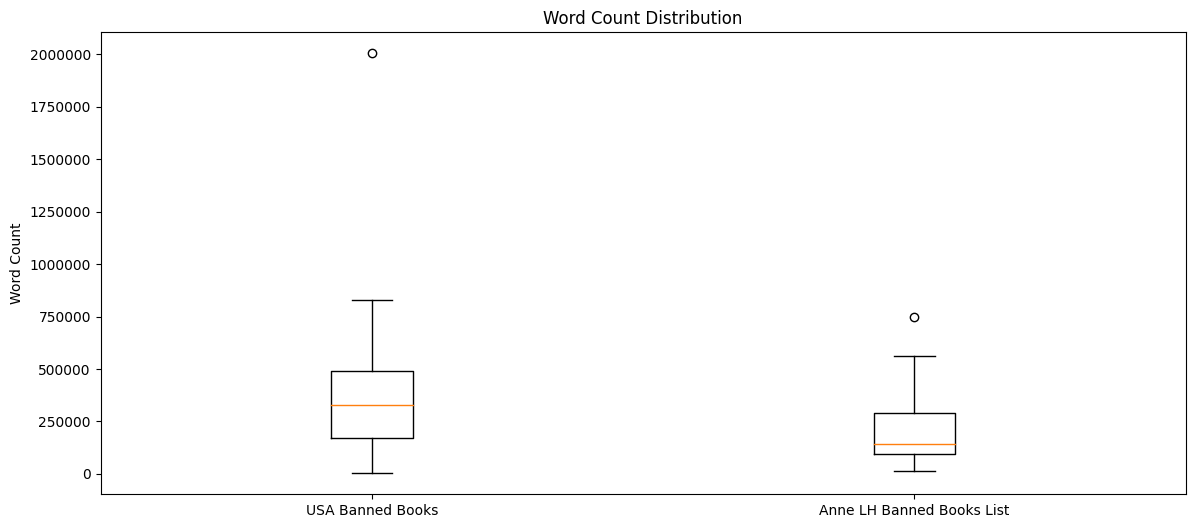

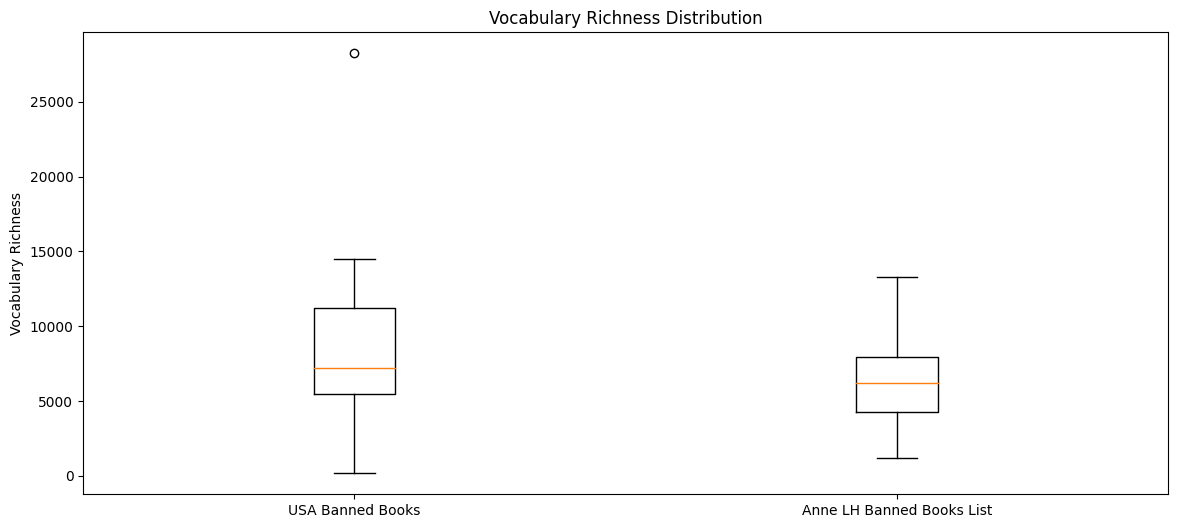

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

USA_corpus_vocabulary = {title: len(set(word for sentence in text for word, _ in sentence)) for title, text in USA_corpus.items()}
AnneLH_corpus_vocabulary = {title: len(set(word for sentence in text for word, _ in sentence)) for title, text in AnneLH_corpus.items()}

# Create box-and-whisker plots for word count
plt.figure(figsize=(14, 6))
plt.boxplot([list(USA_Corpus_wordcount.values()), list(AnneLH_corpus_wordcount.values())], labels=['USA Banned Books', 'Anne LH Banned Books List'])
plt.title('Word Count Distribution')
plt.ylabel('Word Count')

# Set the y-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Create box-and-whisker plots for vocabulary richness
plt.figure(figsize=(14, 6))
plt.boxplot([list(USA_corpus_vocabulary.values()), list(AnneLH_corpus_vocabulary.values())], labels=['USA Banned Books', 'Anne LH Banned Books List'])
plt.title('Vocabulary Richness Distribution')
plt.ylabel('Vocabulary Richness')
plt.show()

In [7]:
import numpy as np
from tabulate import tabulate

# Compute statistics for USA Banned Books and Anne LH Banned Books
usa_wordcounts = list(USA_Corpus_wordcount.values())
annelh_wordcounts = list(AnneLH_corpus_wordcount.values())

usa_statistics = {
    'Min': np.min(usa_wordcounts),
    'Max': np.max(usa_wordcounts),
    '25th Percentile (LQ)': np.percentile(usa_wordcounts, 25),
    '50th Percentile (Median)': np.percentile(usa_wordcounts, 50),
    '75th Percentile (UQ)': np.percentile(usa_wordcounts, 75),
}

annelh_statistics = {
    'Min': np.min(annelh_wordcounts),
    'Max': np.max(annelh_wordcounts),
    '25th Percentile (LQ)': np.percentile(annelh_wordcounts, 25),
    '50th Percentile (Median)': np.percentile(annelh_wordcounts, 50),
    '75th Percentile (UQ)': np.percentile(annelh_wordcounts, 75),
}

# Print the statistics as a table
print("\nStatistics for USA Banned Books Word Counts:")
print(tabulate(usa_statistics.items(), headers=["Statistic", "Value"], tablefmt="pretty"))

print("\nStatistics for Anne LH Banned Books Word Counts:")
print(tabulate(annelh_statistics.items(), headers=["Statistic", "Value"], tablefmt="pretty"))

# Compute statistics for USA Banned Books and Anne LH Banned Books
usa_vocabulary = list(USA_corpus_vocabulary.values())
annelh_vocabulary = list(AnneLH_corpus_vocabulary.values())

usa_statistics = {
    'Min': np.min(usa_vocabulary),
    'Max': np.max(usa_vocabulary),
    '25th Percentile (LQ)': np.percentile(usa_vocabulary, 25),
    '50th Percentile (Median)': np.percentile(usa_vocabulary, 50),
    '75th Percentile (UQ)': np.percentile(usa_vocabulary, 75),
}

annelh_statistics = {
    'Min': np.min(annelh_vocabulary),
    'Max': np.max(annelh_vocabulary),
    '25th Percentile (LQ)': np.percentile(annelh_vocabulary, 25),
    '50th Percentile (Median)': np.percentile(annelh_vocabulary, 50),
    '75th Percentile (UQ)': np.percentile(annelh_vocabulary, 75),
}

# Print the statistics as a table
print("\nStatistics for USA Banned Books Vocabulary Counts:")
print(tabulate(usa_statistics.items(), headers=["Statistic", "Value"], tablefmt="pretty"))

print("\nStatistics for Anne LH Banned Books Vocabulary Counts:")
print(tabulate(annelh_statistics.items(), headers=["Statistic", "Value"], tablefmt="pretty"))


Statistics for USA Banned Books Word Counts:
+--------------------------+-----------+
|        Statistic         |   Value   |
+--------------------------+-----------+
|           Min            |   2949    |
|           Max            |  2005561  |
|   25th Percentile (LQ)   | 170506.75 |
| 50th Percentile (Median) | 330601.5  |
|   75th Percentile (UQ)   | 488513.25 |
+--------------------------+-----------+

Statistics for Anne LH Banned Books Word Counts:
+--------------------------+----------+
|        Statistic         |  Value   |
+--------------------------+----------+
|           Min            |  15421   |
|           Max            |  749149  |
|   25th Percentile (LQ)   | 96707.25 |
| 50th Percentile (Median) | 142977.5 |
|   75th Percentile (UQ)   | 292137.0 |
+--------------------------+----------+

Statistics for USA Banned Books Vocabulary Counts:
+--------------------------+----------+
|        Statistic         |  Value   |
+--------------------------+----------+
|  

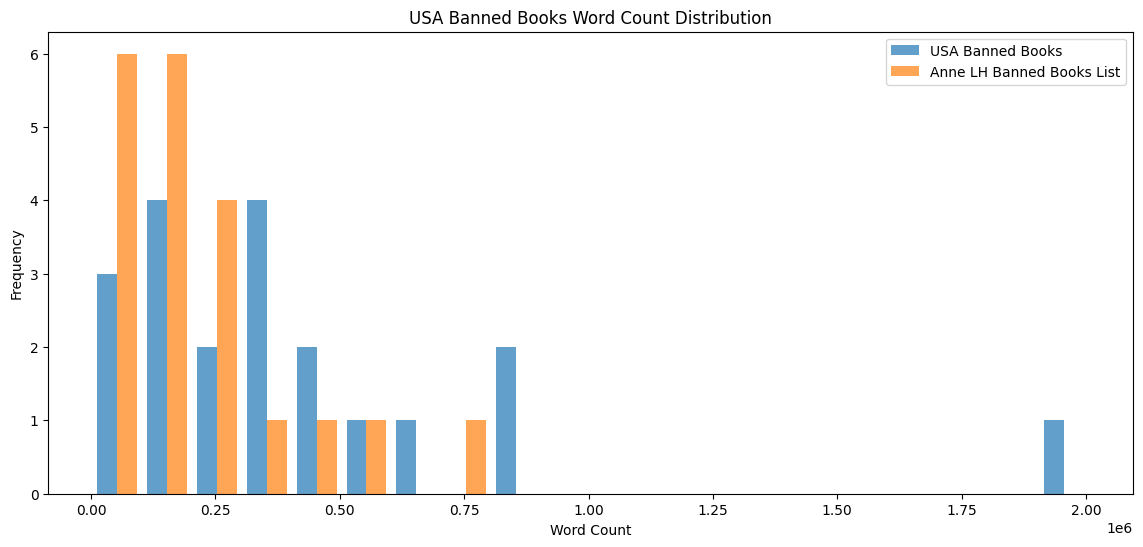

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already defined USA_corpus_wordcount, AnneLH_corpus_wordcount,
# USA_corpus_vocabulary, and AnneLH_corpus_vocabulary as mentioned in your code.

# Create histogram for word count
plt.figure(figsize=(14, 6))
plt.hist([list(USA_Corpus_wordcount.values()), list(AnneLH_corpus_wordcount.values())], bins=20, alpha=0.7, label=['USA Banned Books', 'Anne LH Banned Books List'])
plt.title('USA Banned Books Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histogram for vocabulary richness
plt.figure(figsize=(14, 6))
plt.hist([list(USA_corpus_vocabulary.values()), list(AnneLH_corpus_vocabulary.values())], bins=20, alpha=0.7, label=['USA Banned Books', 'Anne LH Banned Books List'])
plt.title('USA Banned Books Vocabulary Richness Distribution')
plt.xlabel('Vocabulary Richness')
plt.ylabel('Frequency')
plt.legend()
plt.show()



**Histogram Analysis:**

Unimodal, both USA and AnneLH unimodal at 5000 words and 4.0 frequncy.

neither has a semmetrical distribution.

tails are both right skew, with the AnneLH tail being significantly longer due to the range being skewed by an outlier text with over 25000 words., if we remove the outlier AnneLH has a negative kurtosis (lighter tale), while USA maintains a positive kurtosis.

# Sentiment analysis, collocation analysis and linquistic profile



> This Python script employs the Natural Language Toolkit (NLTK) to conduct linguistic analyses on two distinct text corpora. The code encompasses functions for sentiment analysis using the VADER sentiment tool, collocation analysis utilizing pointwise mutual information (PMI), and an overall linguistic profile analysis. The script first imports various NLTK modules, downloads essential resources, and defines functions for sentiment and collocation analysis. The analyze_linguistic_profiles function takes a corpus as input and generates linguistic profiles, including vocabulary richness (unique words), part-of-speech distribution, and significant collocations using PMI. The script then applies this analysis to two different corpora (USA_corpus and AnneLH_corpus), storing the results in variables such as USA_vocab_richness, fantasy_pos_distribution, and fantasy_collocations for the USA_corpus, and ALH_vocab_richness, non_fiction_pos_distribution, and non_fiction_collocations for the AnneLH_corpus. the script is a comprehensive approach to linguistic analysis, offering insights into sentiment, vocabulary richness, part-of-speech distribution, and collocation patterns within the  textual data.



In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from string import punctuation
from nltk import collocations

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

#VADER sentiment analysis tool from NLTK
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(" ".join(word for sentence in text for word, _ in sentence))
    return sentiment_scores

def analyze_sentiment_for_corpus(corpus):
    sentiment_scores_corpus = {}
    for title, text in corpus.items():
        sentiment_scores = analyze_sentiment(text)
        sentiment_scores_corpus[title] = sentiment_scores
    return sentiment_scores_corpus


#pointwise mutual information (PMI) for collocation analysis
def collocation_analysis(processed_tokens):
    flat_tokens = [word for sentence in processed_tokens for word, _ in sentence]
    finder = collocations.BigramCollocationFinder.from_words(flat_tokens)
    collocations_result = finder.nbest(collocations.BigramAssocMeasures().pmi, 10)
    return collocations_result


def analyze_linguistic_profiles(corpus):
    # Vocabulary richness (unique words)
    vocabulary_richness = {title: len(set(word for sentence in text for word, _ in sentence)) for title, text in corpus.items()}

    # Part-of-speech distribution
    pos_distribution = {title: nltk.FreqDist(tag for sentence in text for _, tag in sentence) for title, text in corpus.items()}

    # Collocation analysis
    collocations_result = {title: collocation_analysis(text) for title, text in corpus.items()}

    return vocabulary_richness, pos_distribution, collocations_result

# Analyze linguistic profiles
USA_vocab_richness, fantasy_pos_distribution, fantasy_collocations = analyze_linguistic_profiles(USA_corpus)
ALH_vocab_richness, non_fiction_pos_distribution, non_fiction_collocations = analyze_linguistic_profiles(AnneLH_corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Sentiment analysis for each book in USA_corpus
usa_sentiment_scores = analyze_sentiment_for_corpus(USA_corpus)

# Sentiment analysis for each book in AnneLH_corpus
annelh_sentiment_scores = analyze_sentiment_for_corpus(AnneLH_corpus)

# Display sentiment scores
print("USA Banned Books")
for title, scores in usa_sentiment_scores.items():
    print(f"Sentiment scores for '{title}': {scores}")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Anne LH Banned Books")
for title, scores in annelh_sentiment_scores.items():
    print(f"Sentiment scores for '{title}': {scores}")

USA Banned Books
Sentiment scores for 'The call of the wild': {'neg': 0.165, 'neu': 0.695, 'pos': 0.139, 'compound': -0.9999}
Sentiment scores for 'The Awakening, and Selected Short Stories': {'neg': 0.098, 'neu': 0.706, 'pos': 0.197, 'compound': 1.0}
Sentiment scores for 'The Jungle': {'neg': 0.156, 'neu': 0.716, 'pos': 0.128, 'compound': -1.0}
Sentiment scores for 'Little Black Sambo': {'neg': 0.066, 'neu': 0.748, 'pos': 0.186, 'compound': 0.9972}
Sentiment scores for 'Sons and Lovers': {'neg': 0.14, 'neu': 0.668, 'pos': 0.192, 'compound': 1.0}
Sentiment scores for 'The Adventures of Tom Sawyer, Complete': {'neg': 0.158, 'neu': 0.675, 'pos': 0.167, 'compound': 0.9997}
Sentiment scores for 'Adventures of Huckleberry Finn': {'neg': 0.129, 'neu': 0.711, 'pos': 0.16, 'compound': 1.0}
Sentiment scores for 'Ulysses': {'neg': 0.104, 'neu': 0.732, 'pos': 0.164, 'compound': 1.0}
Sentiment scores for 'Women in Love': {'neg': 0.154, 'neu': 0.626, 'pos': 0.22, 'compound': 1.0}
Sentiment scores f



> This Python code snippet utilizes the PrettyTable library to create formatted tables summarizing the linguistic analysis results for two distinct corpora of books: "USA Banned Books" and "Anne Lyon Height Banned Books." It begins by importing the PrettyTable class and proceeds to construct two tables (USA_table and AnneLH_table) to display linguistic analysis metrics such as vocabulary richness, part-of-speech distribution, and significant collocations for fantasy and non-fiction books, respectively. The tables are populated by iterating through the linguistic analysis results for each book in their respective corpora, and blank rows are inserted for improved table readability. The final step involves printing these well-organized tables, providing a clear and concise presentation of the linguistic profiles for the analyzed books in each category. This enhances the interpretability and comparability of linguistic analysis outcomes for fantasy and non-fiction literature in the specified datasets.



In [11]:
from prettytable import PrettyTable

# Create a table for fantasy books analysis
USA_table = PrettyTable()
USA_table.field_names = ["Title", "Vocabulary Richness", "POS Distribution", "Collocations (Bigrams)"]

for title, richness in USA_vocab_richness.items():
    USA_table.add_row([title, richness, fantasy_pos_distribution[title], fantasy_collocations[title]])
    USA_table.add_row(["", "", "", ""])  # Add a blank row between each book

# Create a table for non-fiction books
AnneLH_table = PrettyTable()
AnneLH_table.field_names = ["Title", "Vocabulary Richness", "POS Distribution", "Collocations"]

for title, richness in ALH_vocab_richness.items():
    AnneLH_table.add_row([title, richness, non_fiction_pos_distribution[title], non_fiction_collocations[title]])
    AnneLH_table.add_row(["", "", "", ""])  # Add a blank row between each book

# Print the table for linquistic analysis
print("USA Banned Books:")
print(USA_table)

print("\nAnne Lyon Height Banned Books:")
print(AnneLH_table)

USA Banned Books:
+----------------------------------------------------------+---------------------+------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                          Title                           | Vocabulary Richness |                POS Distribution                |                                                                                                                                  Collocations (Bigrams)                                                                                                                                 |
+----------------------------------------------------------+---------------------+------------------------------------------------+-----------------------

## POS Tagging



> This Python code snippet utilizes the collections module and the matplotlib.pyplot library to create and display bar plots showcasing the frequency distribution of part-of-speech (POS) tags in two distinct text corpora: "USA_Corpus" and "Anne Lyon Height Corpus." The script defines a function, plot_pos_distribution(corpus, corpus_name), which extracts all POS tags from the input corpus, counts their frequency using the Counter class, and generates a bar plot with POS tags on the x-axis and frequency on the y-axis. The function adds exact frequency numbers atop each bar for clarity and provides a visual representation of the syntactic structure of the analyzed texts. The code then applies this function to the "USA_Corpus" and "Anne Lyon Height Corpus," producing individual bar plots for the distribution of POS tags in each corpus. These visualizations enhance the understanding of the syntactic characteristics of the respective corpora, offering insights into the prevalence of different parts of speech within the analyzed texts. The resulting bar plots serve as informative tools for linguists, researchers, or anyone interested in exploring the linguistic features of textual data.



In [12]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_pos_distribution(corpus, corpus_name):
    # Extract all POS tags from the corpus
    all_pos_tags = []
    for text in corpus.values():
        all_pos_tags.extend([tag for sentence in text for _, tag in sentence])

    # Count the frequency of each POS tag
    pos_counts = Counter(all_pos_tags)

    # Create a bar plot
    x = list(pos_counts.keys())
    y = list(pos_counts.values())

    plt.figure(figsize=(12, 6))
    bars = plt.bar(x, y, color='blue')

    # Add exact numbers on top of the bars
    for bar, count in zip(bars, y):
        plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, str(count), ha='center', va='bottom', color='black')

    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.title(f'Individual POS Tag Frequency Distribution for {corpus_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_pos_distribution(USA_corpus, 'USA_Corpus')
plot_pos_distribution(AnneLH_corpus, 'Anne Lyon Height Corpus')

Cultural References:

Identify and compare cultural references or allusions in the texts.
Explore whether there are specific themes or cultural elements that are more common in banned books. - takes about 6-7 minutes to go through all the texts.



> This Python script integrates the spaCy library for natural language processing and the Gensim library for Word2Vec embeddings to conduct a multifaceted analysis of cultural references in two distinct text corpora: "AnneLH_corpus" and "USA_corpus." After loading the spaCy English language model and setting the maximum length for text processing, the script defines functions for Named Entity Recognition (NER), analysis of cultural themes based on predefined keywords, and exploration of Word2Vec embeddings for cultural context analysis. The functions are then collectively employed in a comprehensive function, analyze_cultural_references_for_corpus, which iterates over each book in a given corpus, extracting entities, analyzing theme frequencies, and exploring cultural contexts. The script additionally defines a list of cultural keywords, such as "war," "freedom," "sex," "rebellion," "society," and "race." These cultural keywords are utilized in the analysis of cultural references for both the "AnneLH_corpus" (annelh_cultural_references) and the "USA_corpus" (usa_cultural_references). The results, encompassing entities, theme frequencies, and similar words based on Word2Vec embeddings, are stored in dictionaries, providing a comprehensive exploration of cultural references within the analyzed texts for further examination and interpretation. This script serves as a powerful tool for researchers interested in understanding the cultural dimensions embedded in textual data.



In [13]:
import spacy
from gensim.models import Word2Vec
from collections import defaultdict
nlp = spacy.load("en_core_web_sm")

# Set the max_length
nlp.max_length = 2500000


# Function for Named Entity Recognition
def analyze_named_entities(text):
    doc = nlp(" ".join(word for sentence in text for word, _ in sentence))
    entities = [ent.text for ent in doc.ents]
    return entities

# Function for Cultural Themes Analysis
def analyze_cultural_themes(text, cultural_keywords):
    flat_tokens = [word.lower() for sentence in text for word, _ in sentence]
    theme_frequency = {theme: flat_tokens.count(theme) for theme in cultural_keywords}
    return theme_frequency

# Function for Word Embeddings and Cultural Context Analysis
def analyze_cultural_context(word_embeddings_model, cultural_keywords):
    similar_words = {theme: word_embeddings_model.wv.most_similar(theme, topn=5) for theme in cultural_keywords}
    return similar_words

# Function to analyze cultural references for a given corpus
def analyze_cultural_references_for_corpus(corpus):
    cultural_references = {}
    for title, text in corpus.items():
        # Named Entity Recognition
        entities = analyze_named_entities(text)

        # Cultural Themes Analysis
        theme_frequency = analyze_cultural_themes(text, cultural_keywords)

        # Store the results in a dictionary
        cultural_references[title] = {"entities": entities, "theme_frequency": theme_frequency}

    return cultural_references

# Define a list of cultural keywords
cultural_keywords = ["war", "freedom", "sex", "rebellion", "society", "race"]

# Analyze cultural references for each book in AnneLH corpus
annelh_cultural_references = analyze_cultural_references_for_corpus(AnneLH_corpus)

# Similarly, analyze cultural references for each book in USA corpus
usa_cultural_references = analyze_cultural_references_for_corpus(USA_corpus)




> This Python code utilizes the matplotlib, seaborn, and pandas libraries to visually represent and compare cultural theme frequencies in two distinct text corpora: "AnneLH_corpus" and "USA_corpus." The script begins by converting the theme frequencies obtained from cultural references analysis into Pandas DataFrames (annelh_df and usa_df) for streamlined plotting. The data is then reshaped using the stack function, resulting in melted DataFrames (melted_annelh_df and melted_usa_df). Column names are appropriately renamed for clarity. Subsequently, subplots are created with a two-row, one-column layout, and horizontal bar charts are generated using Seaborn's barplot function. The charts depict theme frequencies with book titles distinguished by color, providing a visual comparison between the two corpora. Adjustments to the layout and legends ensure a clean and informative presentation. The resulting visualization offers a clear and insightful exploration of cultural theme distributions, allowing for an easy comparison of thematic content within each book across the "AnneLH_corpus" and "USA_corpus."



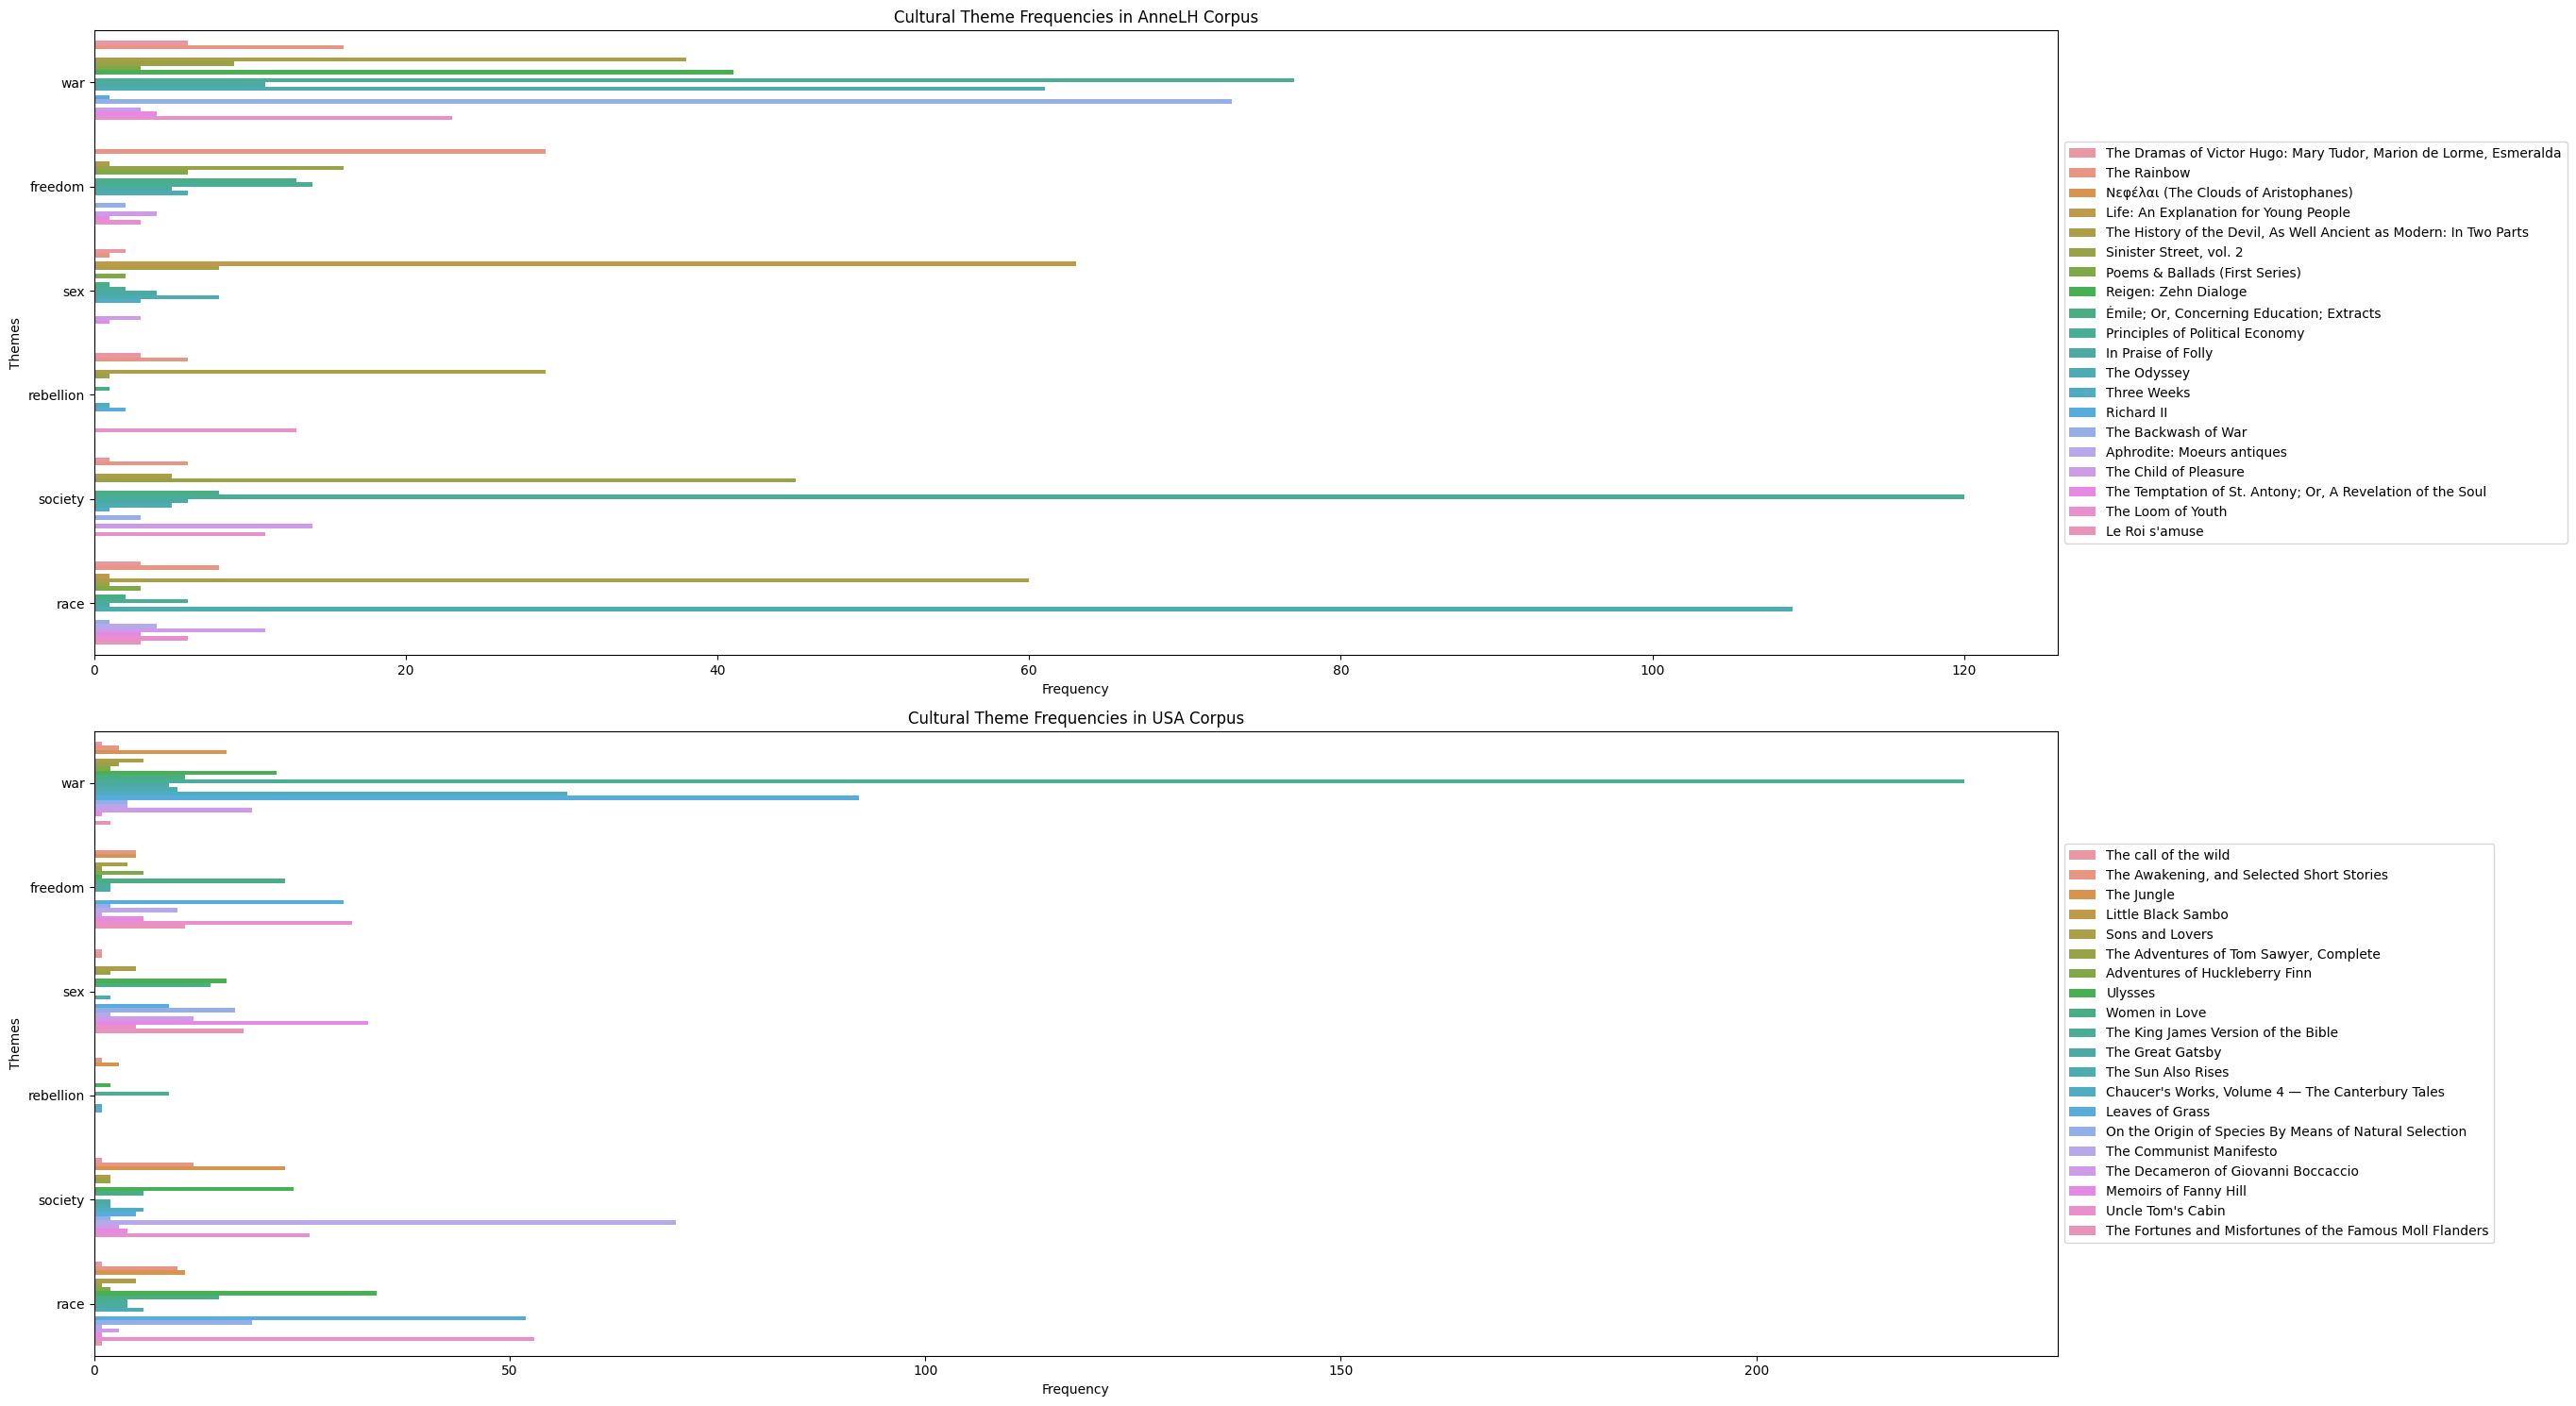

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert theme frequencies to a DataFrame for easier plotting
annelh_df = pd.DataFrame(annelh_cultural_references).T
usa_df = pd.DataFrame(usa_cultural_references).T

# Reshape data for easier plotting
melted_annelh_df = annelh_df['theme_frequency'].apply(pd.Series).stack().reset_index()
melted_usa_df = usa_df['theme_frequency'].apply(pd.Series).stack().reset_index()

# Rename columns
melted_annelh_df.columns = ['Title', 'Theme', 'Frequency']
melted_usa_df.columns = ['Title', 'Theme', 'Frequency']

# Create subplots for each corpus
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(22, 15))

# Plot horizontal bar chart for AnneLH corpus
sns.barplot(data=melted_annelh_df, x='Frequency', y='Theme', hue='Title', ax=axes[0])
axes[0].set_title('Cultural Theme Frequencies in AnneLH Corpus')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Themes')

# Plot horizontal bar chart for USA corpus
sns.barplot(data=melted_usa_df, x='Frequency', y='Theme', hue='Title', ax=axes[1])
axes[1].set_title('Cultural Theme Frequencies in USA Corpus')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Themes')

# Adjust layout
plt.tight_layout()

# Move legends to the right of the graphs
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

AnneLH:

at least 1 book with high frequency of detected themes in each keyword search.
War, society and race and sex had the highest frequency with more books spiking for these catergories than others.Rebellion was the most lacking catergory.



USA:

less instense spikes over all catergories compared to AnneLH books, simmilarly to AnneLH war appreared with the highest frequency, followed by society and race. Rebellion seemed to be the most lacking catergory.



In [15]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Set the max_length
nlp.max_length = 2500000

# Function to identify cultural references for each book in a corpus
def identify_cultural_references(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Identify named entities related to cultural references
    cultural_references = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE", "EVENT"]]

    return cultural_references

def identify_cultural_references_for_corpus(corpus):
    cultural_references_corpus = {}
    for title, text in corpus.items():
        cultural_references = identify_cultural_references(" ".join(" ".join(word for word, _ in sentence) for sentence in text))
        cultural_references_corpus[title] = cultural_references
    return cultural_references_corpus

# Identify cultural references for each book in USA_corpus
USA_cultural_references = identify_cultural_references_for_corpus(USA_corpus)

# Identify cultural references for each book in AnneLH_corpus
AnneLH_cultural_references = identify_cultural_references_for_corpus(AnneLH_corpus)

# Display results
print("Cultural References for USA Corpus:")
for title, references in USA_cultural_references.items():
    print(f"{title}: {references}")

print("\nCultural References for AnneLH Corpus:")
for title, references in AnneLH_cultural_references.items():
    print(f"{title}: {references}")

Cultural References for USA Corpus:
The call of the wild: ['jack london', 'chapter', 'fang chapter', 'san diego', 'frost buck', 'big house', 'santa clara', 'miller place', 'veranda', 'miller', 'demesne buck', 'feet', 'paddocks berry', 'miller', 'aristocrat', 'quick jaws', 'san francisco', 'seattle', 'coat sprayed', 'dave', 'wolf', 'jaw wolf', 'billee joe', 'joe', 'joe', 'dave', 'dave', 'wrought dave', 'supreme expression', 'delight dave', 'dave', 'miller', 'easier development retrogression rapid', 'buck gif heem', 'gar gif heem', 'eef spitz', 'gaunt', 'joe', 'jerk buck', 'joe', 'frien', 'mek mad', 'dim dawn', 'dave buck', 'wolf', 'pride dave', 'santa clara', 'valley buck', 'wolf', 'delight join', 'aurora borealis', 'world day', 'joe', 'leap leap', 'leaden', 'delight buck', 'thrill', 'spitz ram', 'dave buck', 'buck heels', 'joe', 'whine mercy general tone team', 'teek koona', 'celerity buck', 'miller big house', 'santa clara', 'yukon bank', 'yukon bank', 'joe', 'fed', 'dave', 'dave', 'i




> Spacy NER model list



```
PERSON:      People, including fictional.
NORP:        Nationalities or religious or political groups.
FAC:         Buildings, airports, highways, bridges, etc.
ORG:         Companies, agencies, institutions, etc.
GPE:         Countries, cities, states.
LOC:         Non-GPE locations, mountain ranges, bodies of water.
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
EVENT:       Named hurricanes, battles, wars, sports events, etc.
WORK_OF_ART: Titles of books, songs, etc.
LAW:         Named documents made into laws.
LANGUAGE:    Any named language.
DATE:        Absolute or relative dates or periods.
TIME:        Times smaller than a day.
PERCENT:     Percentage, including ”%“.
MONEY:       Monetary values, including unit.
QUANTITY:    Measurements, as of weight or distance.
ORDINAL:     “first”, “second”, etc.
CARDINAL:    Numerals that do not fall under another type.
```




This Python code performs Named Entity Recognition (NER) and categorization using the spaCy library on a given corpus of texts. It begins by loading the English NLP model from spaCy and setting the maximum length for processing. The analyze_named_entities function takes a text as input, tokenizes it using spaCy, and identifies named entities. The named entities are then extracted, including their text and label (e.g., "PERSON," "ORG," etc.). The analyze_named_entities_for_corpus function applies the previous function to each text in a corpus, storing the results in a dictionary with book titles as keys.

The final function, categorize_entities, organizes the named entities into different categories such as "Person," "Organization," "Location," etc. It uses a defaultdict to create lists for each category and iterates through the named entities, assigning them to the appropriate category based on their entity type. The resulting categorized entities are returned as a dictionary.

In [16]:
import spacy
from collections import defaultdict
import pandas as pd

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Set the max_length
nlp.max_length = 2500000

# Function for Named Entity Recognition
def analyze_named_entities(text):
    doc = nlp(" ".join(word for sentence in text for word, _ in sentence))
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities
# Function to analyze named entities for each book in the corpus
def analyze_named_entities_for_corpus(corpus):
    named_entities_corpus = {}
    for title, text in corpus.items():
        named_entities = analyze_named_entities(text)
        named_entities_corpus[title] = named_entities
    return named_entities_corpus

def categorize_entities(entities):
    categorized_entities = defaultdict(list)

    for entity_text, entity_type in entities:
        # Check for terms related to each category
        if entity_type == "PERSON":
            categorized_entities["Person"].append(entity_text)
        elif entity_type == "NORP":
            categorized_entities["Nationality/Religion/Political Group"].append(entity_text)
        elif entity_type == "FAC":
            categorized_entities["Building/Facility"].append(entity_text)
        elif entity_type == "ORG":
            categorized_entities["Organization"].append(entity_text)
        elif entity_type == "GPE":
            categorized_entities["Location (Country/City/State)"].append(entity_text)
        elif entity_type == "LOC":
            categorized_entities["Other Location"].append(entity_text)
        elif entity_type == "PRODUCT":
            categorized_entities["Product"].append(entity_text)
        elif entity_type == "EVENT":
            categorized_entities["Event"].append(entity_text)
        elif entity_type == "WORK_OF_ART":
            categorized_entities["Work of Art"].append(entity_text)
        elif entity_type == "LAW":
            categorized_entities["Law/Document"].append(entity_text)
        elif entity_type == "LANGUAGE":
            categorized_entities["Language"].append(entity_text)
        elif entity_type == "DATE":
            categorized_entities["Date"].append(entity_text)
        elif entity_type == "TIME":
            categorized_entities["Time"].append(entity_text)
        elif entity_type == "PERCENT":
            categorized_entities["Percent"].append(entity_text)
        elif entity_type == "MONEY":
            categorized_entities["Money"].append(entity_text)
        elif entity_type == "QUANTITY":
            categorized_entities["Quantity"].append(entity_text)
        elif entity_type == "ORDINAL":
            categorized_entities["Ordinal"].append(entity_text)
        elif entity_type == "CARDINAL":
            categorized_entities["Cardinal"].append(entity_text)

    return categorized_entities




In this code cell (and the onendirectly after) The code utilizes the previously defined functions (analyze_named_entities and categorize_entities) to analyze and categorize named entities for a corpus named AnneLH_corpus. The results are stored in the entities_result dictionary, where each key corresponds to a book title, and the value is a dictionary containing categorized entities.

the code creates a Pandas DataFrame named dfAnne from the entities_result dictionary. The DataFrame is constructed using a dictionary comprehension, where the keys are tuples representing the book title and entity category, and the values are the corresponding lists of entities -  it then uses the display function from IPython to present the DataFrame.

In [17]:
# Importing necessary libraries
from IPython.display import display
import pandas as pd

# Analyze and categorize entities for AnneLH_corpus
entities_result = {}
for title, text in AnneLH_corpus.items():
    named_entities = analyze_named_entities(text)
    categorized_entities = categorize_entities(named_entities)
    entities_result[title] = categorized_entities


# Assuming you have already created the DataFrame 'df'
# Create a Pandas DataFrame for better display
dfAnne = pd.DataFrame.from_dict({(i, j): entities_result[i][j] for i in entities_result.keys() for j in entities_result[i].keys()}, orient='index')

# Display the DataFrame nicely
display(dfAnne)

0     \
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                   hugo   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...               new york   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...  peter fenelon collier   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...              dulverton   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                    two   
...                                                                   ...   
(Le Roi s'amuse, Time)                                           toujours   
(Le Roi s'amuse, Other Location)                                    grâce   
(Le Roi s'amuse, Date)                                               yeux   
(Le Roi s'amuse, Work of Art)                           mouchoir à non ce   
(Le Roi s'amuse, Quantity)                                         oh ton   

                                                                  1     \
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                None   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...              london   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...          mary tudor   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...  simon renard house   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                 two   
...                                                                ...   
(Le Roi s'amuse, Time)                                            fort   
(Le Roi s'amuse, Other Location)                               jupiter   
(Le Roi s'amuse, Date)                                           satan   
(Le Roi s'amuse, Work of Art)                                     None   
(Le Roi s'amuse, Quantity)                                        None   

                                                              2     \
(The Dramas of Victor Hugo: Mary Tudor, Marion ...            None   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...          london   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...      mary tudor   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...           house   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...             two   
...                                                            ...   
(Le Roi s'amuse, Time)                                        None   
(Le Roi s'amuse, Other Location)                    journées quand   
(Le Roi s'amuse, Date)                                        None   
(Le Roi s'amuse, Work of Art)                                 None   
(Le Roi s'amuse, Quantity)                                    None   

                                                                                  3     \
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                                None   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                              london   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...  jane gilbert fabiano fabiani simon   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                                 fed   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...                               three   
...                                                                                ...   
(Le Roi s'amuse, Time)                                                            None   
(Le Roi s'amuse, Other Location)                                          parfois avec   
(Le Roi s'amuse, Date)                                                            None   
(Le Roi s'amuse, Work of Art)                                                     None   
(Le Roi s'amuse, Quantity)                                                        None   

                                                               4     \
(The Dramas of Victor Hugo: Mary Tudor, Marion ...             None   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...            italy   
(The Dramas of Victor Hugo: Mary Tudor, Marion ...          clinton   
(The Dramas of Victor Hugo: Mary Tudor, Marion ..

In [18]:
# Analyze and categorize entities for AnneLH_corpus
entities_result = {}
for title, text in USA_corpus.items():
    named_entities = analyze_named_entities(text)
    categorized_entities = categorize_entities(named_entities)
    entities_result[title] = categorized_entities

dfUSA = pd.DataFrame.from_dict({(i, j): entities_result[i][j] for i in entities_result.keys() for j in entities_result[i].keys()}, orient='index')

# Display the DataFrame nicely
display(dfUSA)

0     \
(The call of the wild, Organization)                         jack london   
(The call of the wild, Law/Document)                          chapter ii   
(The call of the wild, Person)                              fang chapter   
(The call of the wild, Location (Country/City/S...             san diego   
(The call of the wild, Other Location)                            arctic   
...                                                                  ...   
(The Fortunes and Misfortunes of the Famous Mol...           three miles   
(The Fortunes and Misfortunes of the Famous Mol...               english   
(The Fortunes and Misfortunes of the Famous Mol...         north england   
(The Fortunes and Misfortunes of the Famous Mol...  john street vulgarly   
(The Fortunes and Misfortunes of the Famous Mol...                 satin   

                                                                    1     \
(The call of the wild, Organization)                             chapter   
(The call of the wild, Law/Document)                          chapter ii   
(The call of the wild, Person)                                frost buck   
(The call of the wild, Location (Country/City/S...           santa clara   
(The call of the wild, Other Location)                             earth   
...                                                                  ...   
(The Fortunes and Misfortunes of the Famous Mol...  five shillings pound   
(The Fortunes and Misfortunes of the Famous Mol...               english   
(The Fortunes and Misfortunes of the Famous Mol...         north england   
(The Fortunes and Misfortunes of the Famous Mol...        dunstable hill   
(The Fortunes and Misfortunes of the Famous Mol...                  None   

                                                                     2     \
(The call of the wild, Organization)                            big house   
(The call of the wild, Law/Document)                first crawl feet teek   
(The call of the wild, Person)                               miller place   
(The call of the wild, Location (Country/City/S...                veranda   
(The call of the wild, Other Location)                             arctic   
...                                                                   ...   
(The Fortunes and Misfortunes of the Famous Mol...   three hundred pounds   
(The Fortunes and Misfortunes of the Famous Mol...                english   
(The Fortunes and Misfortunes of the Famous Mol...            new england   
(The Fortunes and Misfortunes of the Famous Mol...            john street   
(The Fortunes and Misfortunes of the Famous Mol...                   None   

                                                             3     \
(The call of the wild, Organization)                   quick jaws   
(The call of the wild, Law/Document)                         None   
(The call of the wild, Person)                             miller   
(The call of the wild, Location (Country/City/S...  san francisco   
(The call of the wild, Other Location)                      earth   
...                                                           ...   
(The Fortunes and Misfortunes of the Famous Mol...  fifteen miles   
(The Fortunes and Misfortunes of the Famous Mol...        english   
(The Fortunes and Misfortunes of the Famous Mol...           None   
(The Fortunes and Misfortunes of the Famous Mol...  hick hall old   
(The Fortunes and Misfortunes of the Famous Mol...           None   

                                                                           4     \
(The call of the wild, Organization)                         supreme expression   
(The call of the wild, Law/Document)                                       None   
(The call of the wild, Person)                                     demesne buck   
(The call of the wild, Location (Country/City/S...                      seattle   
(The call of the wild, Other Location)                                   


This code defines two functions, analyze_named_entities_summary and display_named_entities_summary, for summarizing and displaying named entities from a given text. The analyze_named_entities_summary function takes a text as input, tokenizes it using spaCy, extracts the named entities, and counts the occurrences of each entity type using the Counter class from the collections module. The function returns a list of named entities and a Counter object containing the counts.

The display_named_entities_summary function takes the list of named entities and the Counter object as input and formats them into a table using the tabulate function from the tabulate library. This table is then printed to the console, displaying the entity types and their respective counts in a grid format.

In [19]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")


# Set the max_length
nlp.max_length = 2500000

# Function to extract NORP entities and create frequency plot
def plot_norp_entity_frequency(corpus):
    all_norp_entities = []

    for title, processed_text in corpus.items():
        # Combine all sentences into a single text
        flattened_text = [token[0] for sentence in processed_text for token in sentence]
        text = " ".join(flattened_text)

        # Process text with spaCy NER
        doc = nlp(text)

        # Extract NORP named entities and count their occurrences
        norp_entities = [ent.text for ent in doc.ents if ent.label_ == "GPE" and ent.text.strip()]
        all_norp_entities.extend(norp_entities)

        # Plot frequency distribution for each text
        norp_entity_counter = Counter(norp_entities)
        plt.figure(figsize=(12, 6))
        plt.bar(norp_entity_counter.keys(), norp_entity_counter.values(), color='skyblue')
        plt.title(f"GPE Entity Frequency - {title}", fontsize=16)
        plt.xlabel("GPE Entity", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xticks(rotation=45, ha="right", fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()




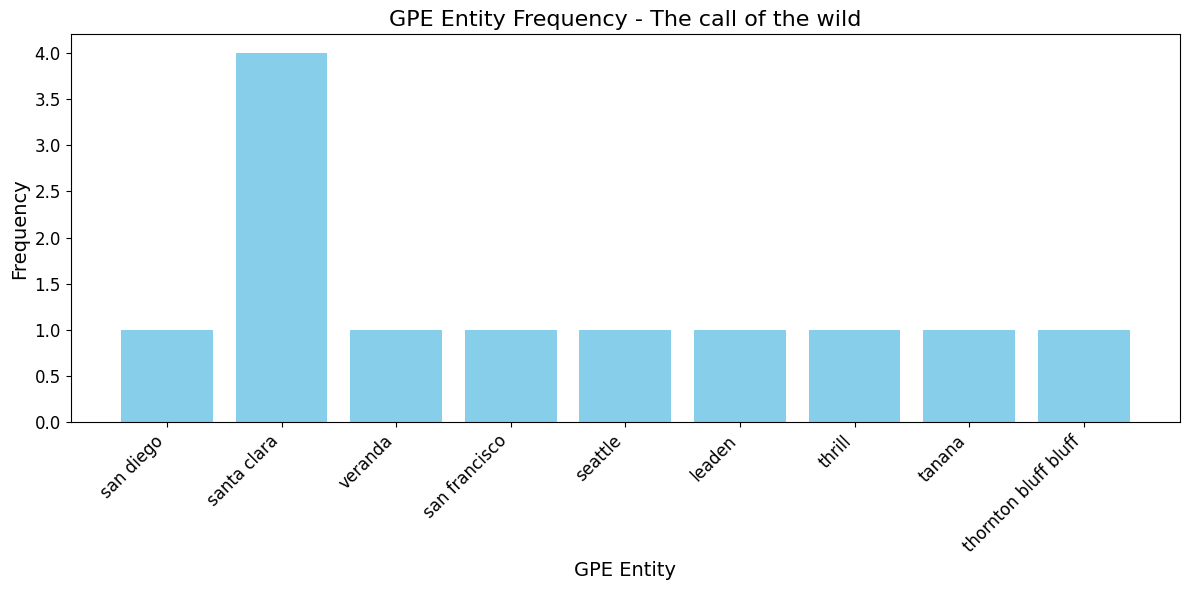

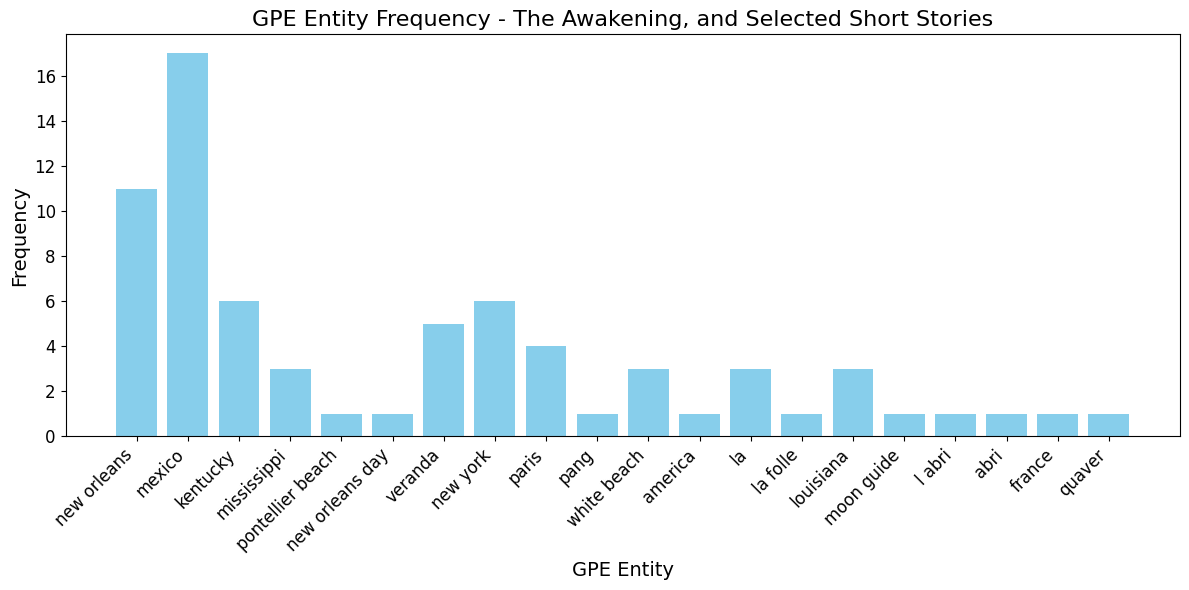

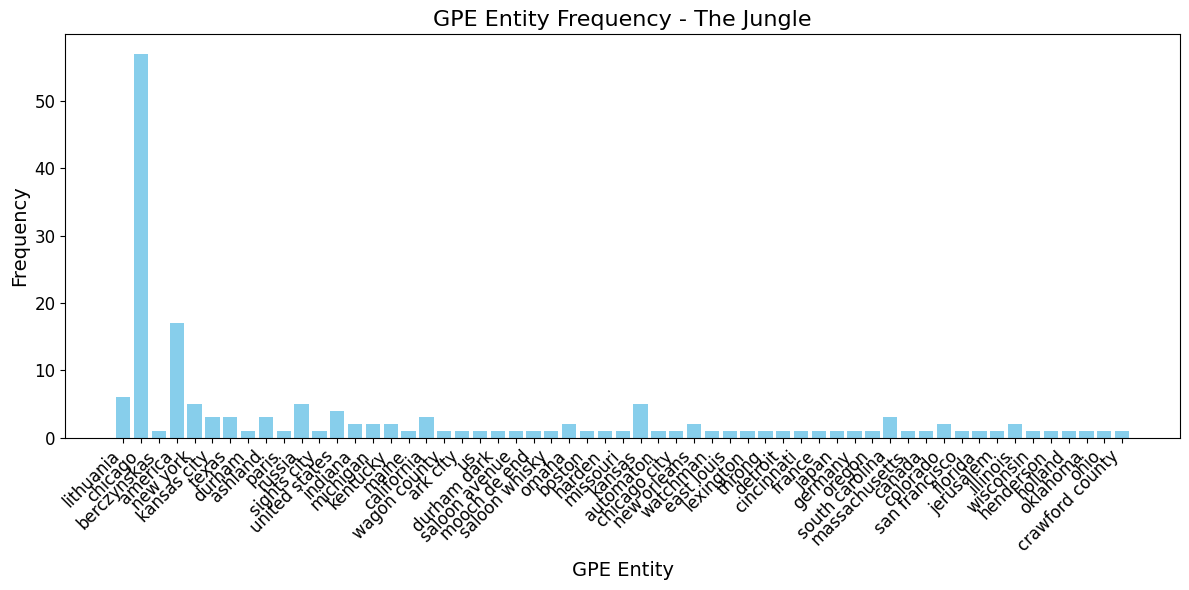

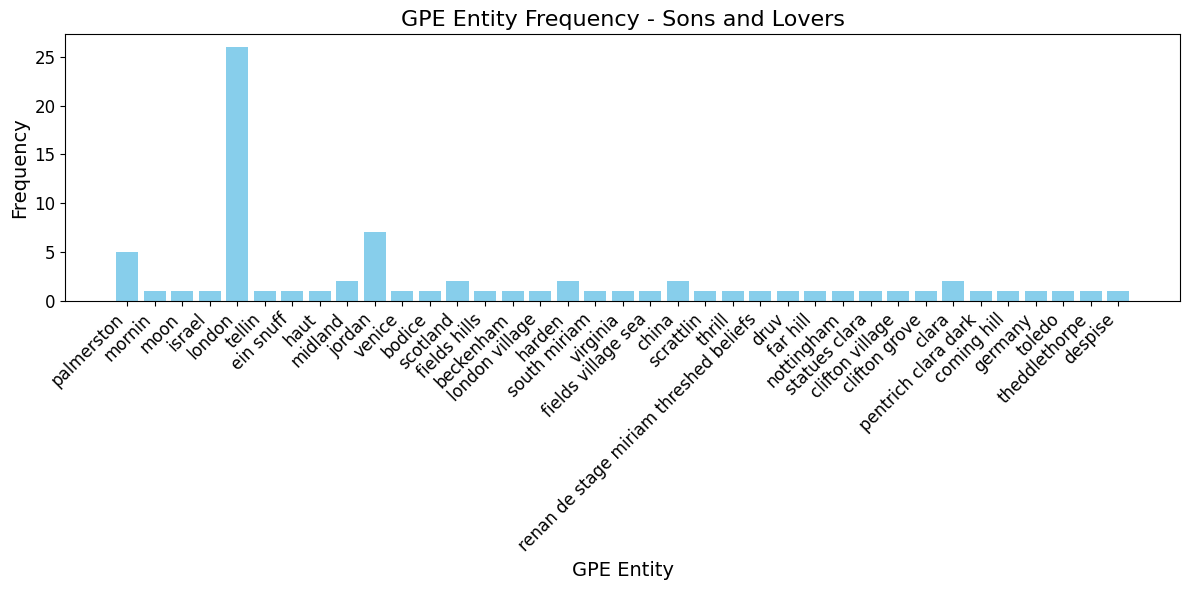

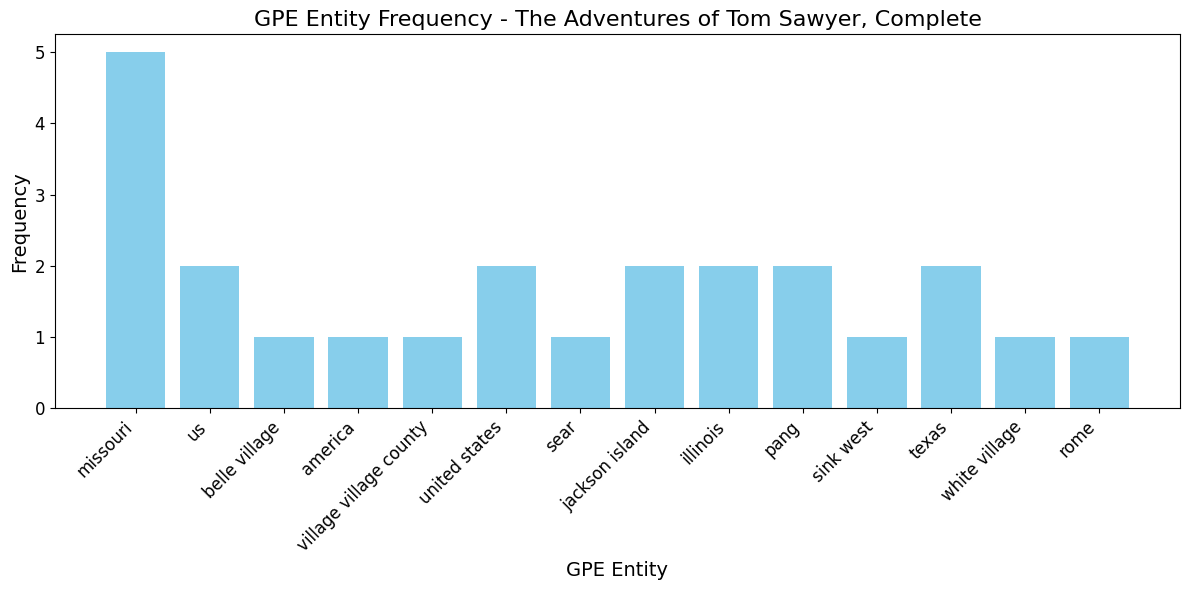

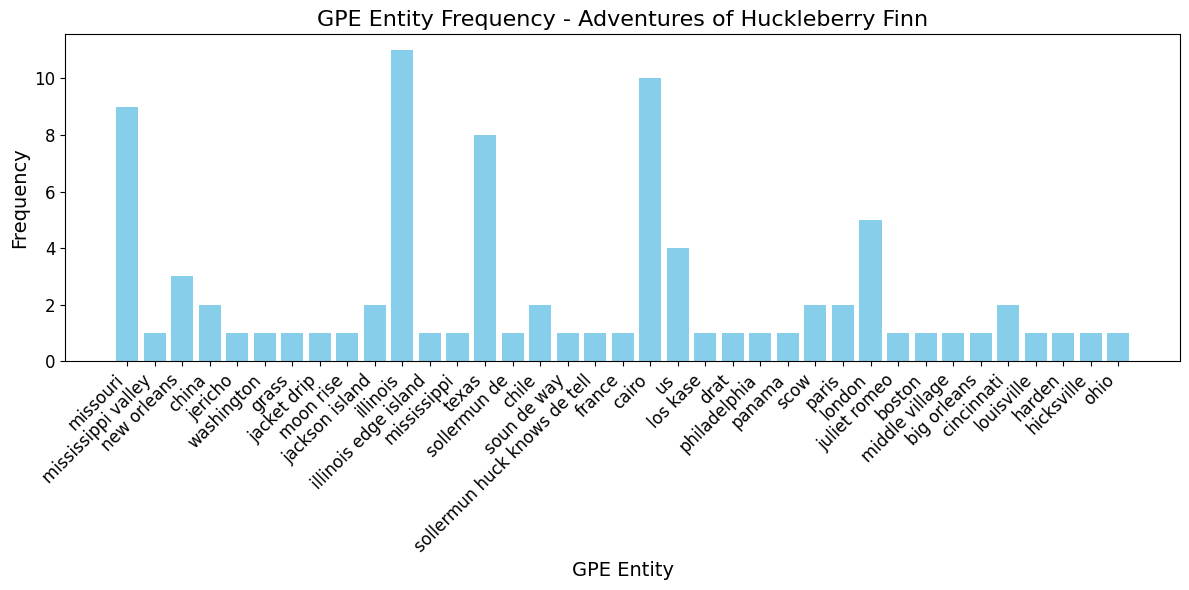

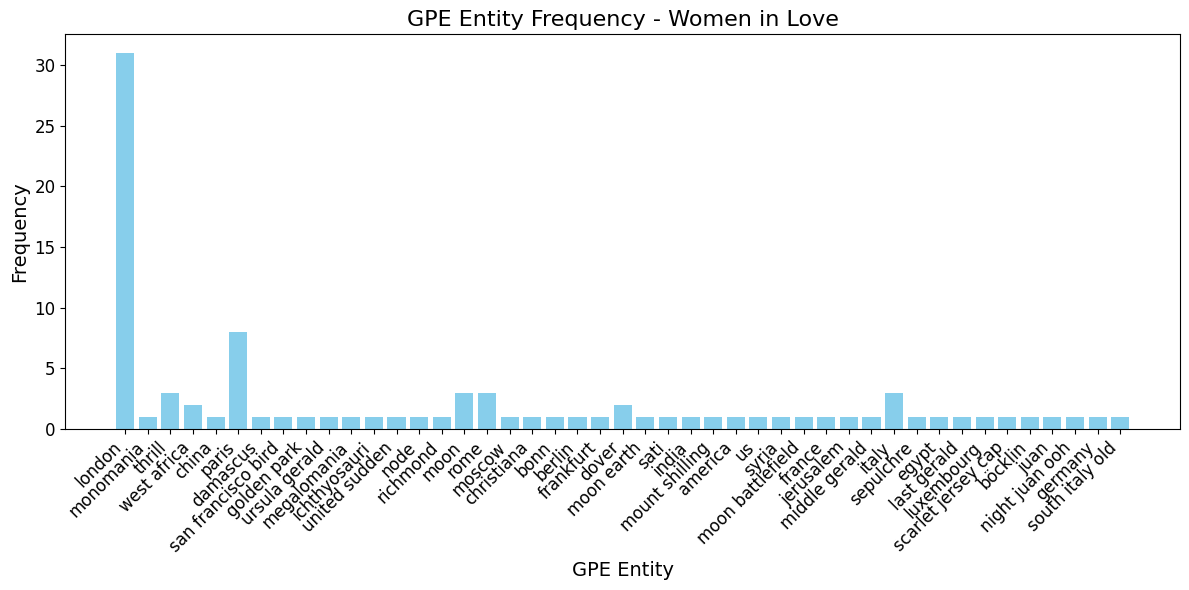

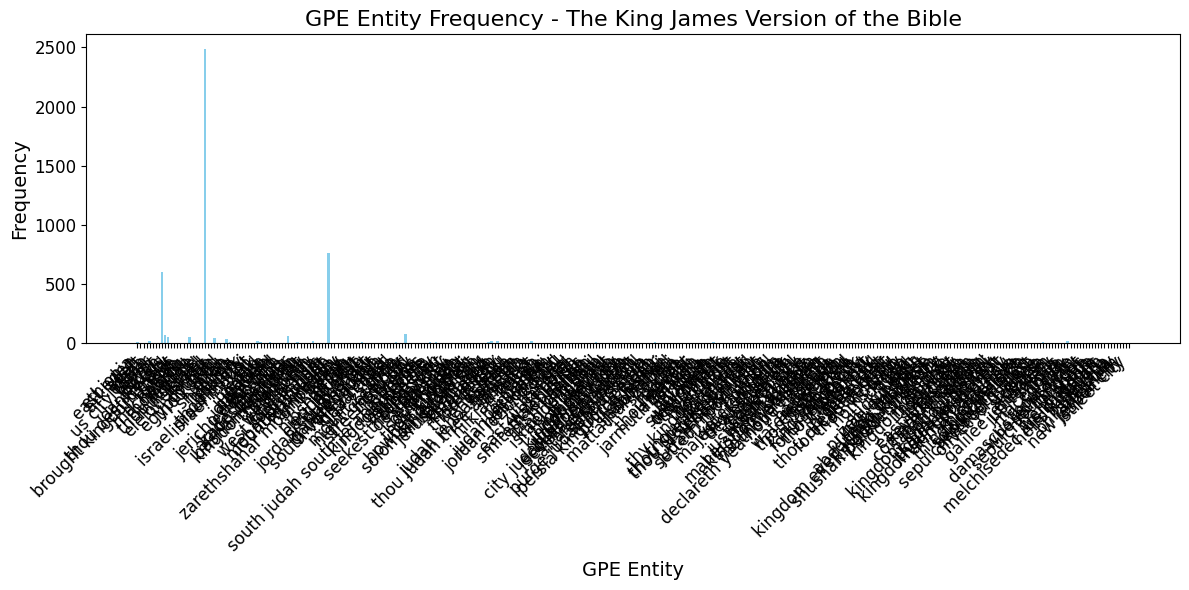

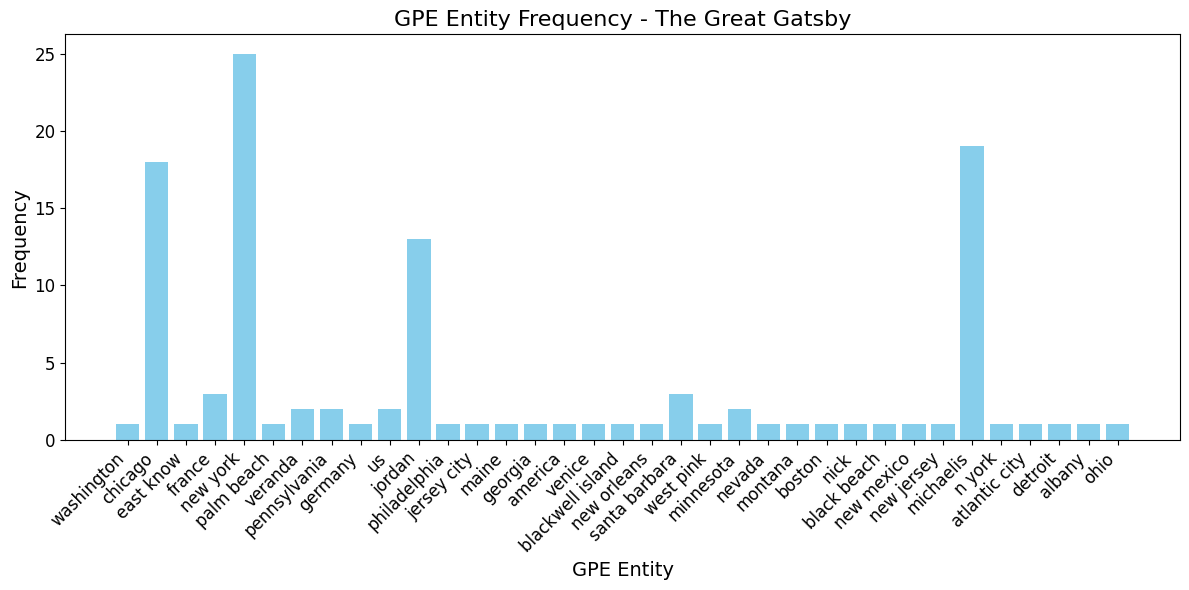

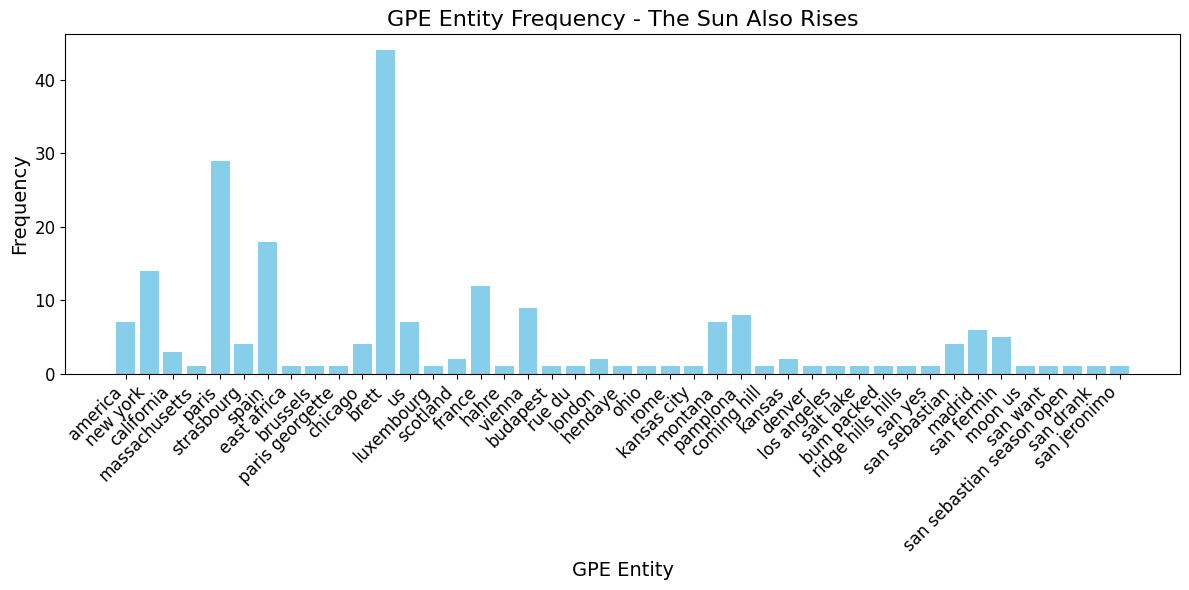

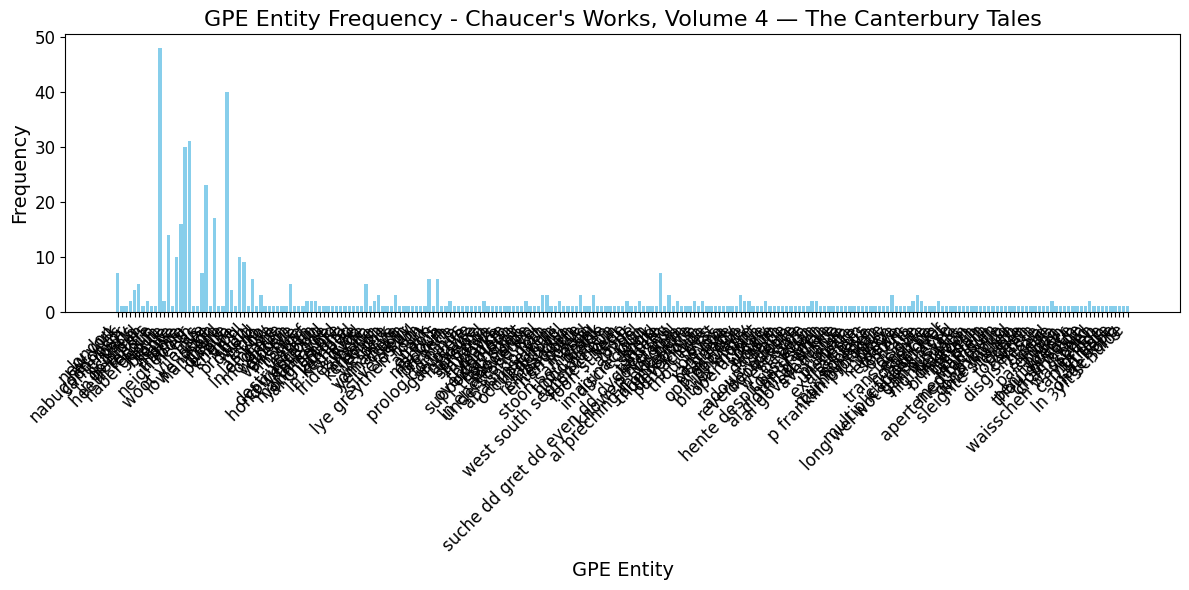

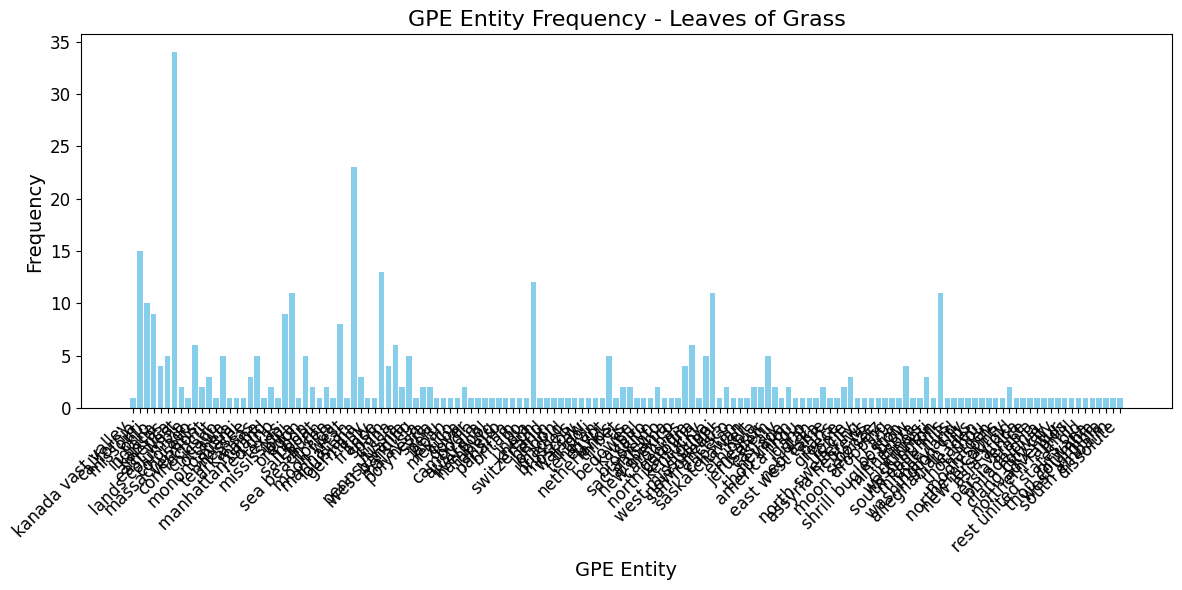

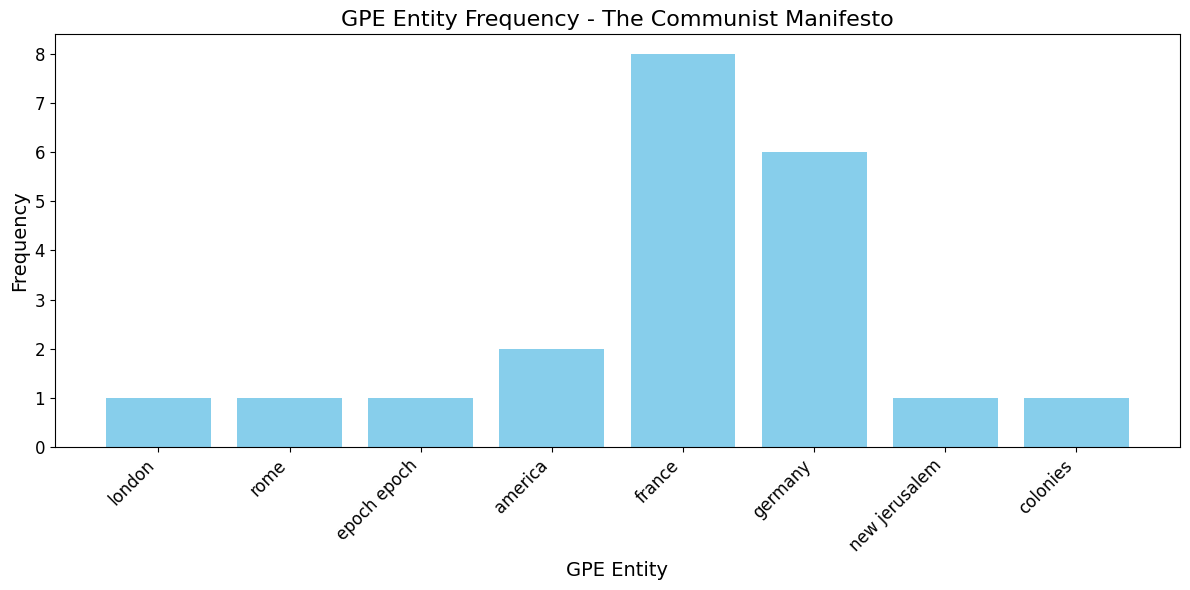

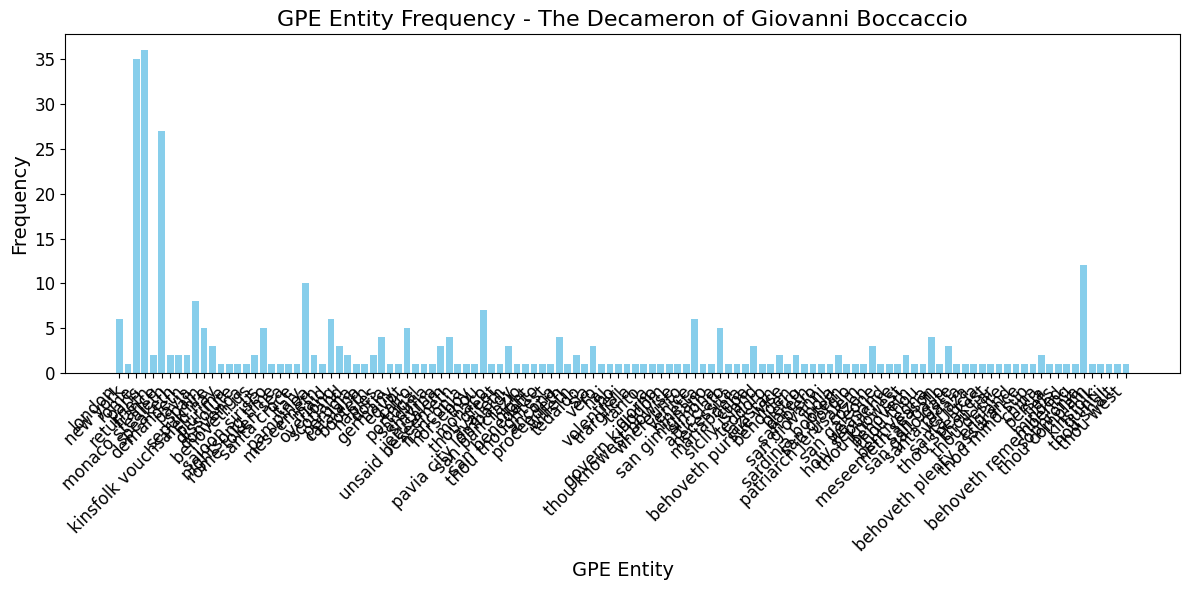

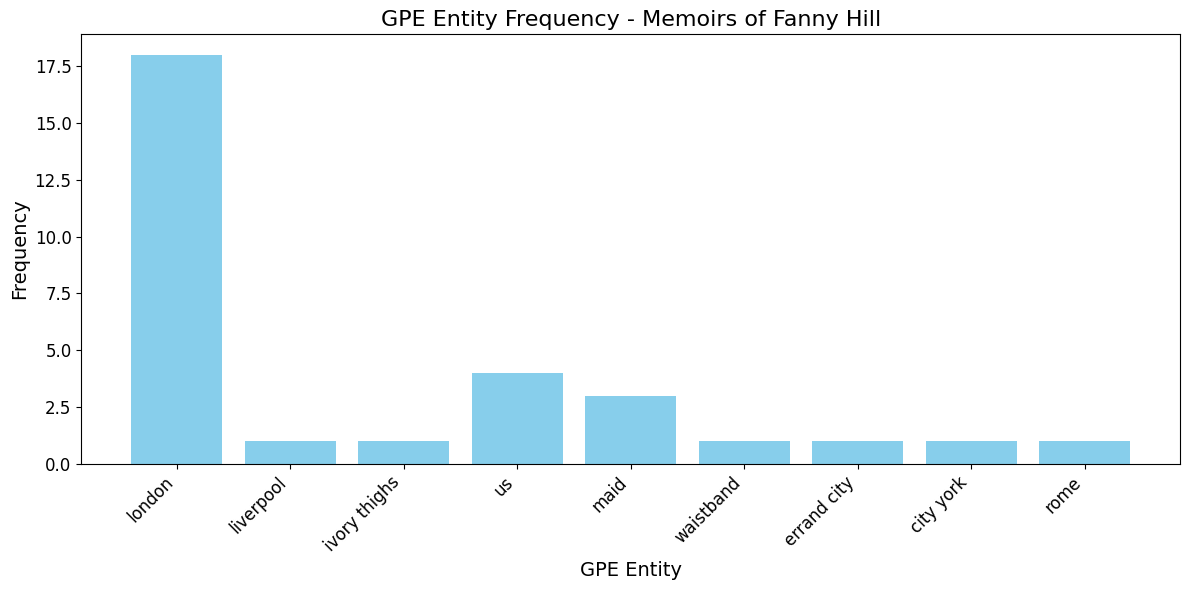

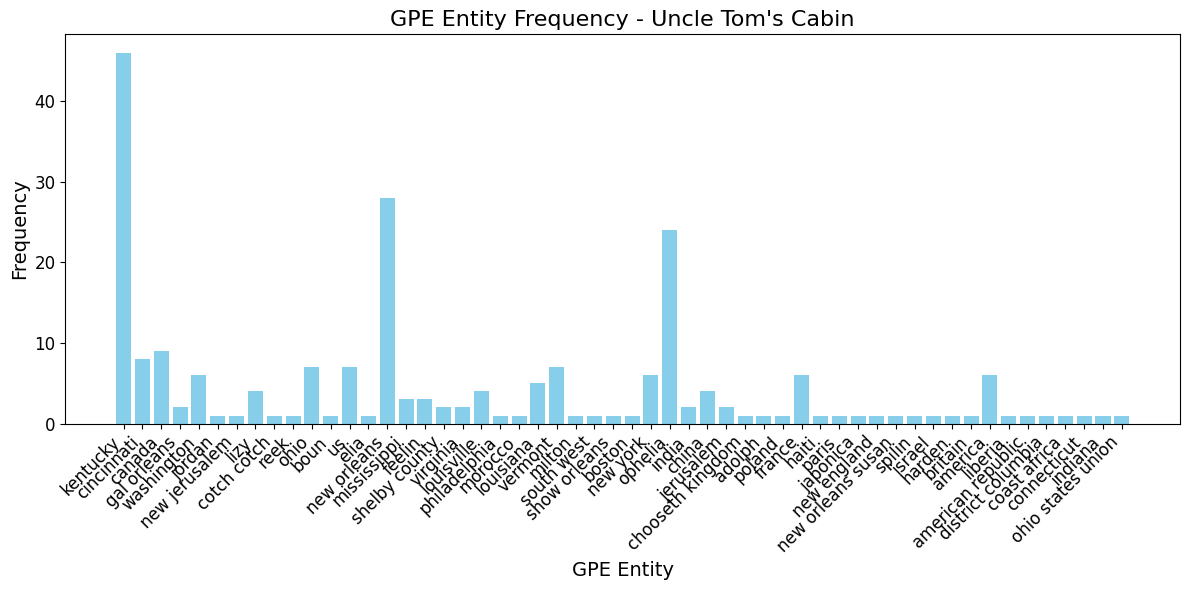

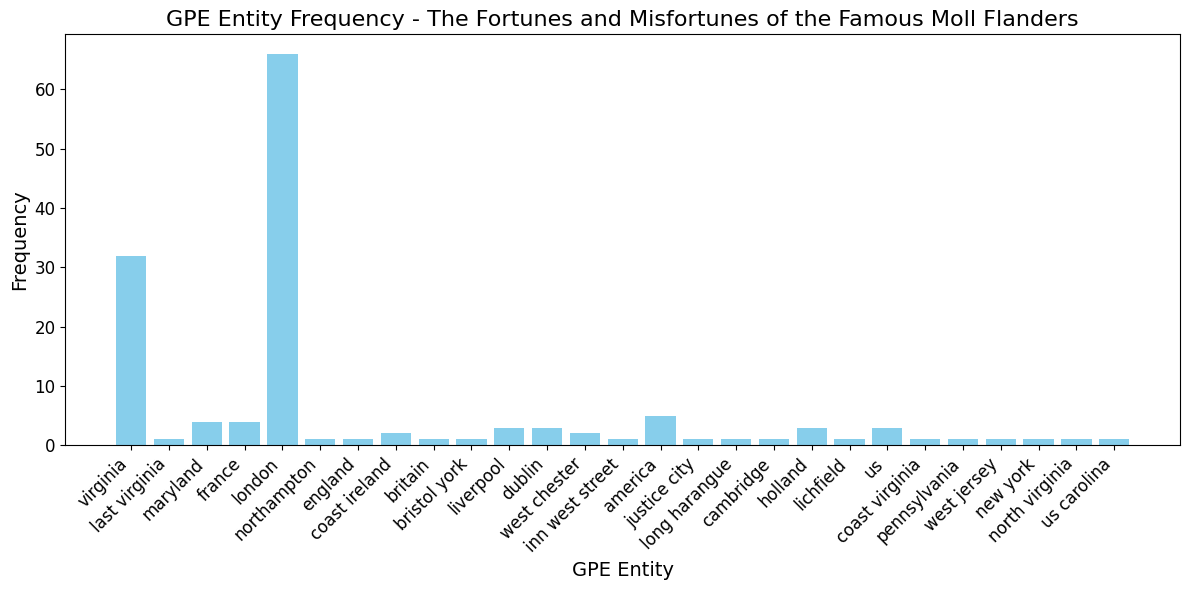

In [20]:
# Create frequency plots for NORP entities in USA_corpus and AnneLH_corpus
plot_norp_entity_frequency(USA_corpus)

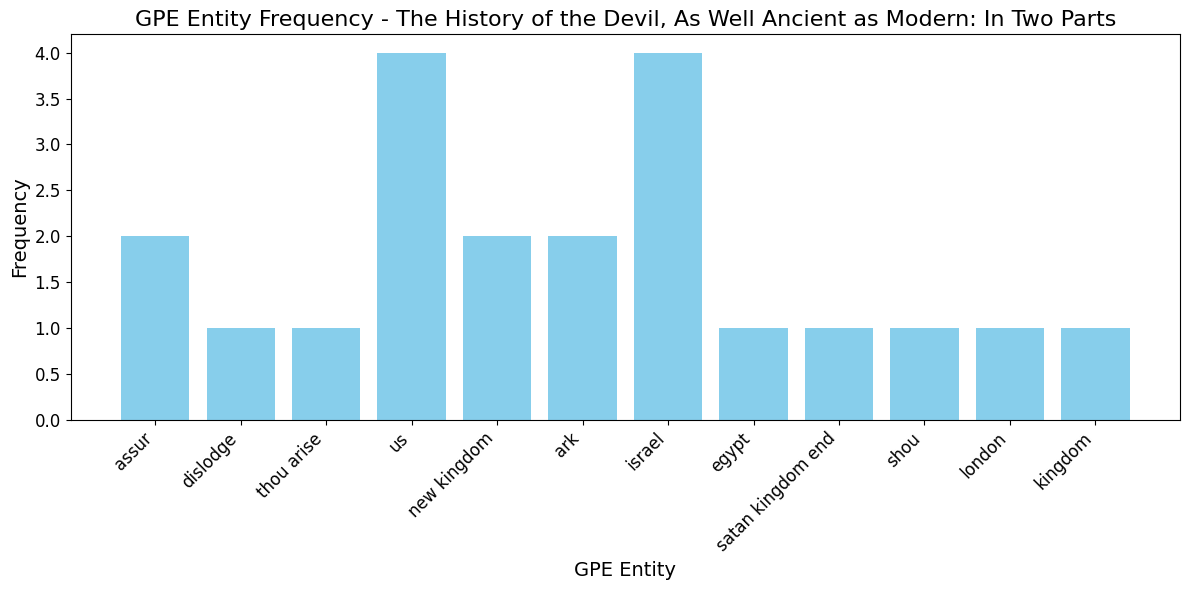

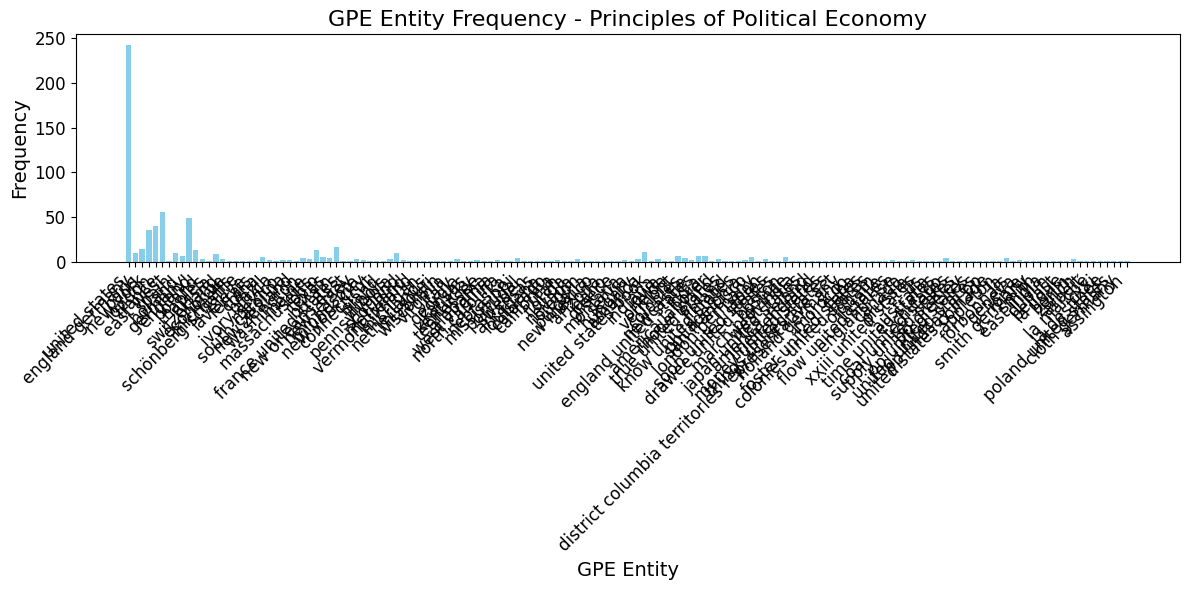

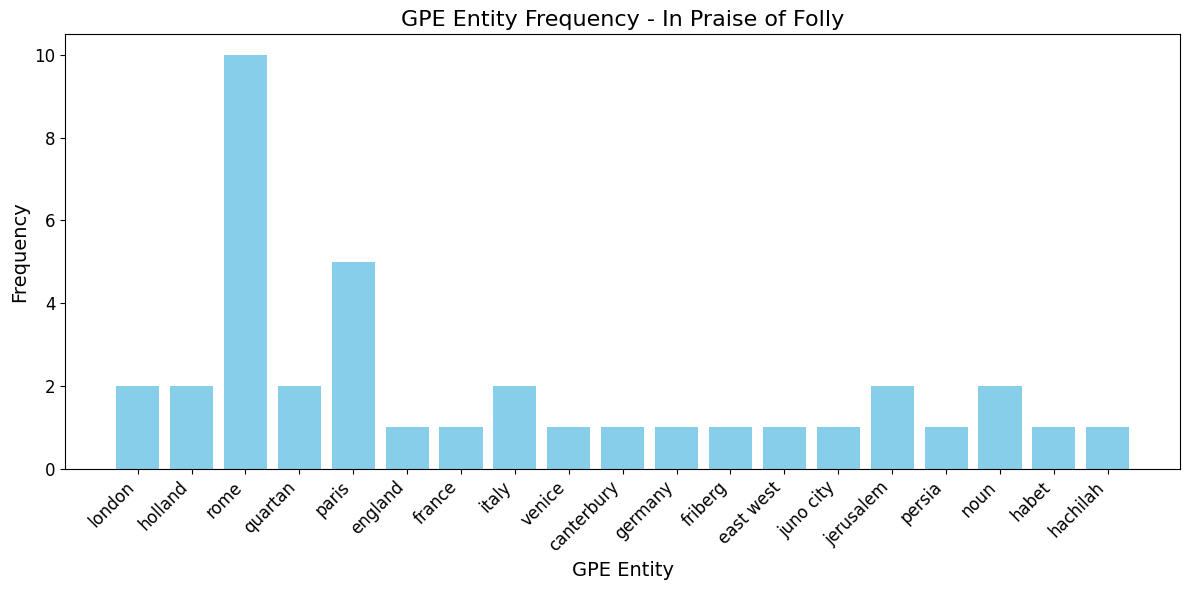

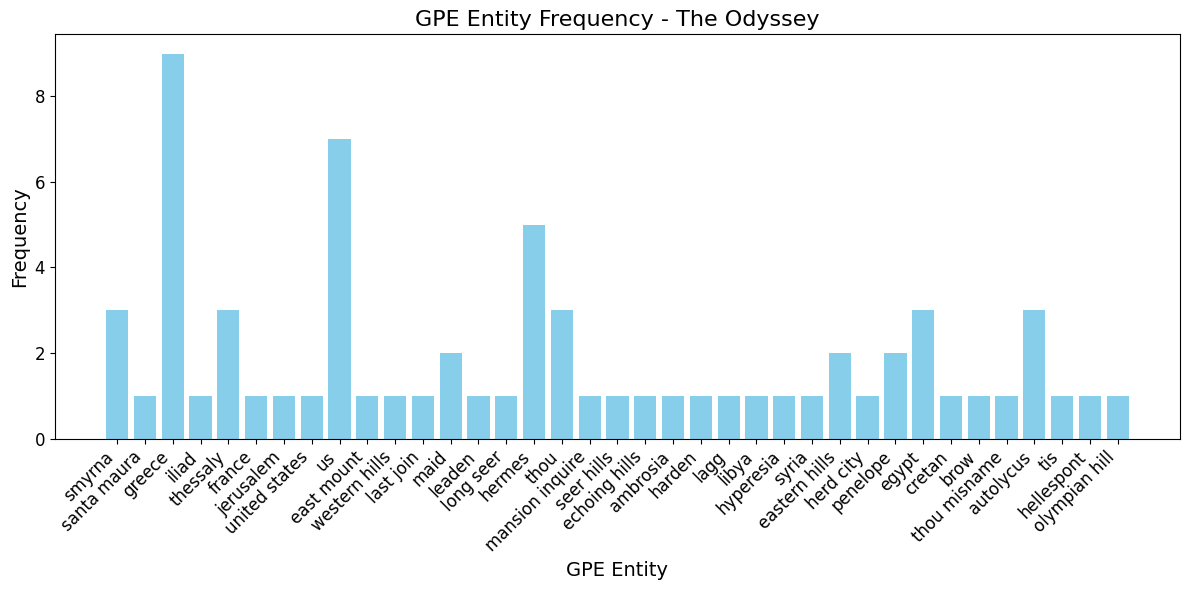

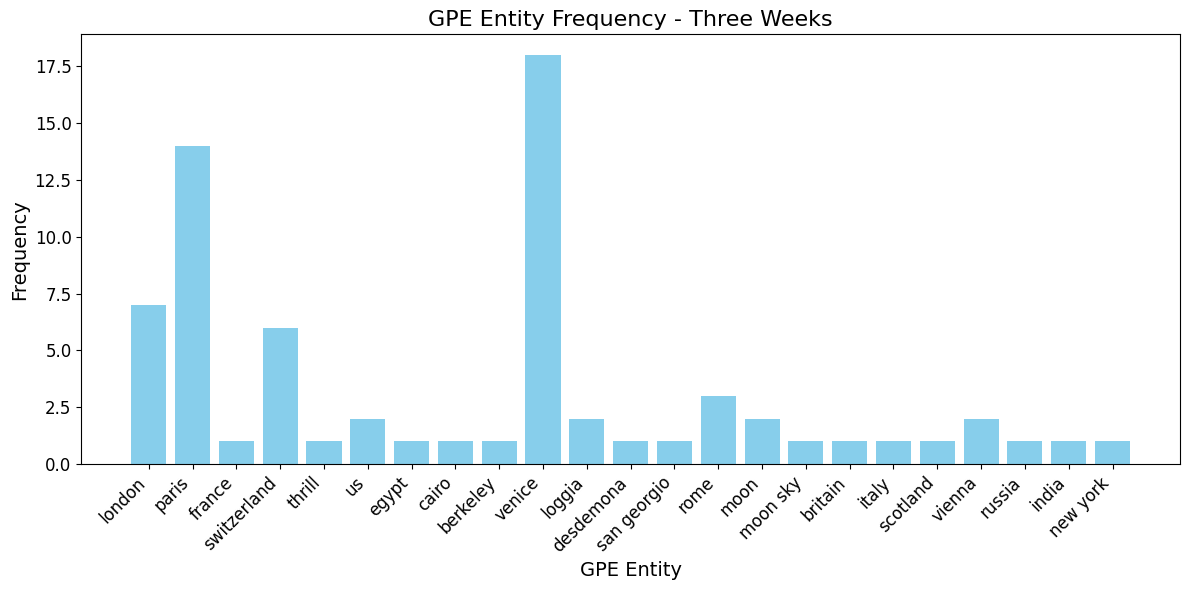

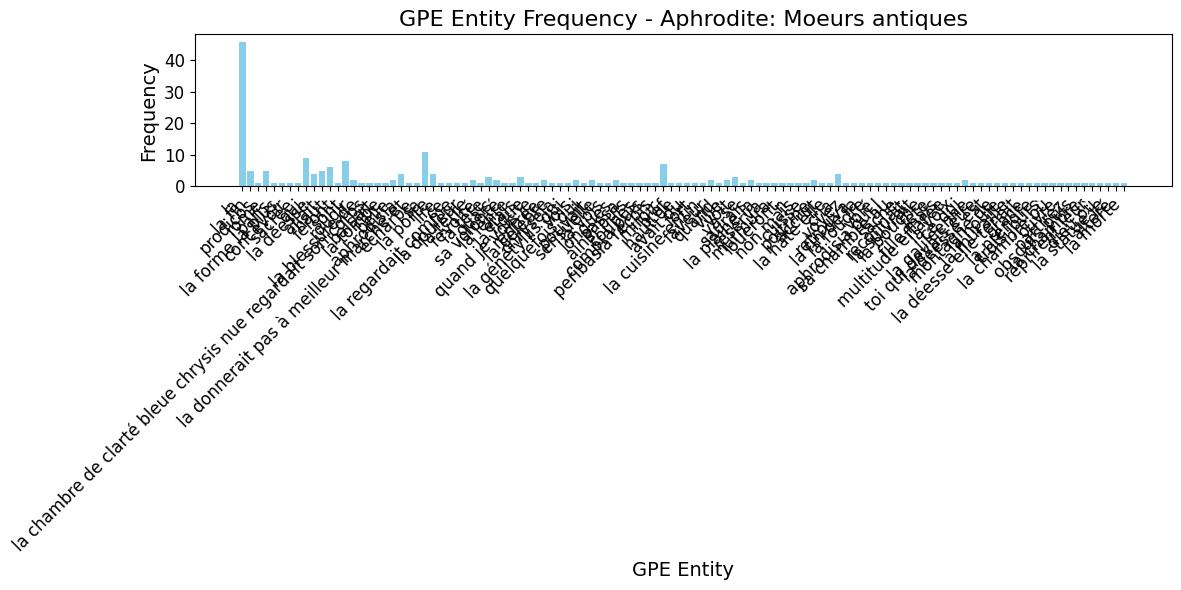

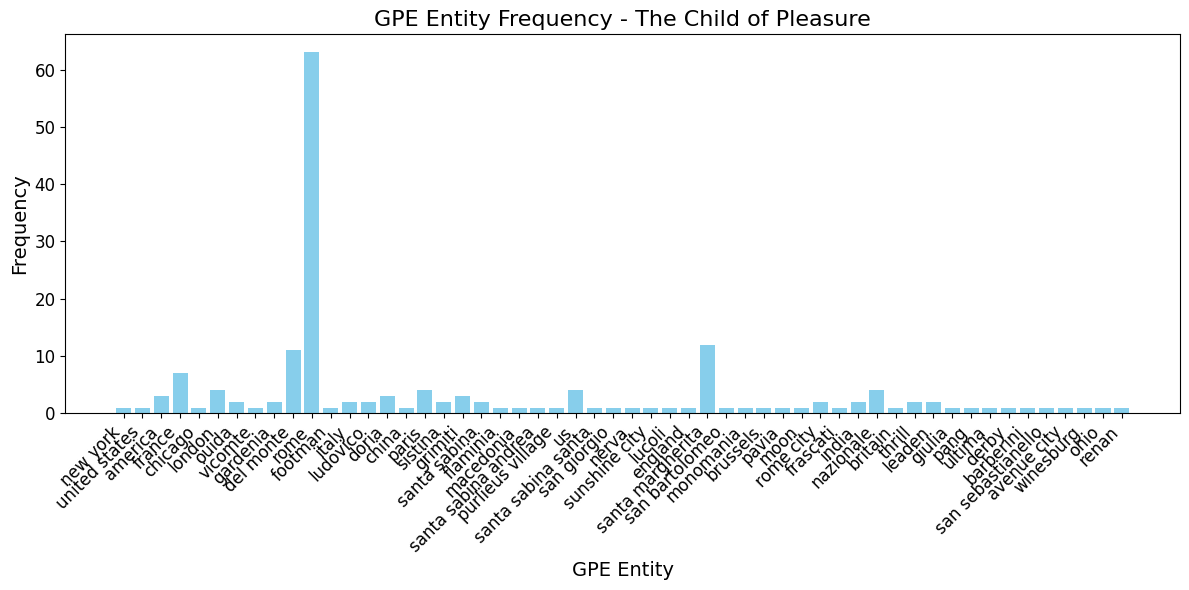

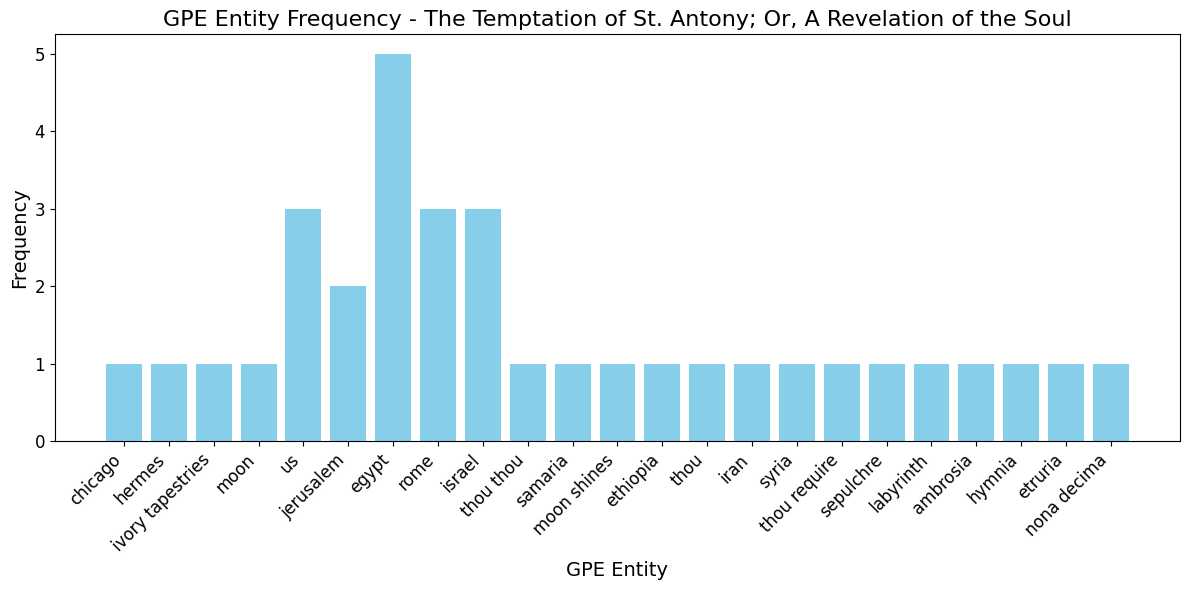

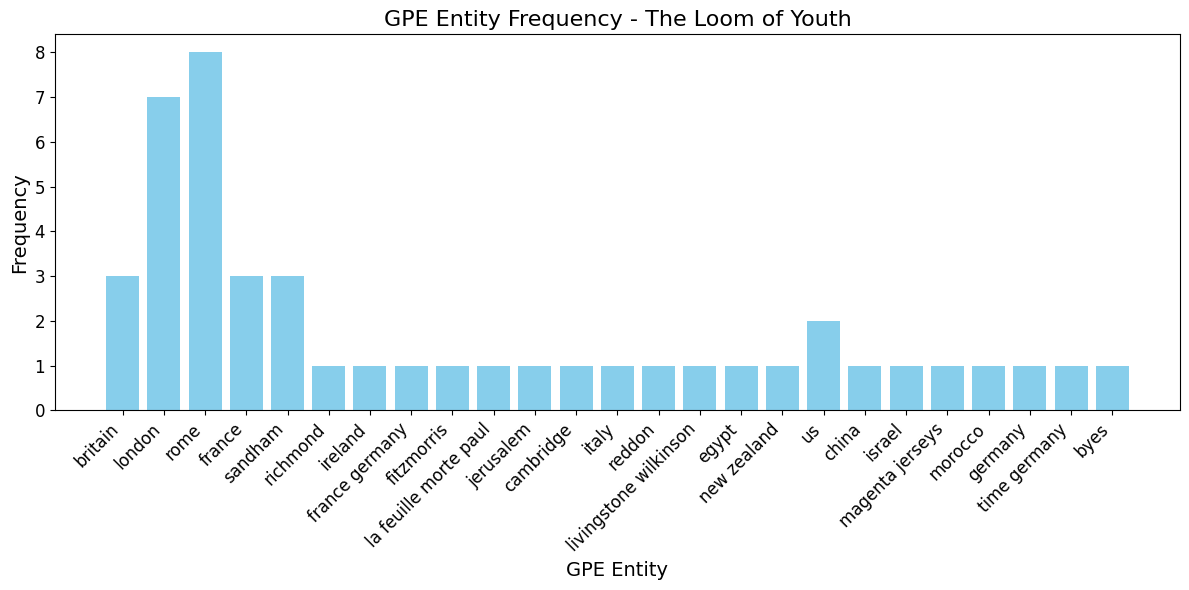

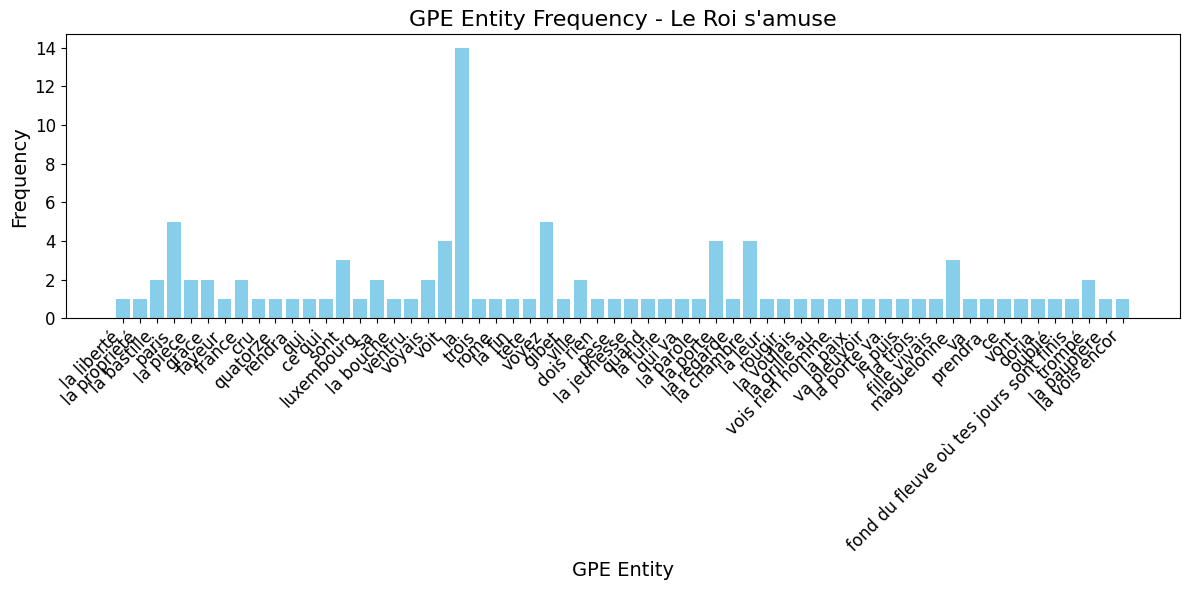

In [21]:
plot_norp_entity_frequency(AnneLH_corpus)

# **Results and Discussion**


# Vocabulary Richness (Unique words) and Collocations (Bigrams)


# **Vocabulary Richness:**

Statistics for USA Banned Books Vocabulary Richness:

* |           Min            |   178    |
* |           Max            |  28246   |
* |   25th Percentile (LQ)   | 5504.75  |
* | 50th Percentile (Median) |  7236.5  |
* |   75th Percentile (UQ)   | 11248.25 |

Statistics for Anne LH Banned Books Vocabulary Richness:

* |           Min            |  1166   |
* |           Max            |  13267  |
* |   25th Percentile (LQ)   | 4262.5  |
* | 50th Percentile (Median) | 6214.0  |
* |   75th Percentile (UQ)   | 7926.75 |


### **Histogram Analysis:**

*Modality:*

> Both USA and AnneLH datasets exhibit a unimodal distribution. The modes occur at approximately 5000 words with a frequency of 4.0.
Symmetry:
Neither dataset has a symmetric distribution.

*Skewness: italicized text*

> Both datasets show right-skewed tails. The AnneLH tail is notably longer due to the presence of an outlier text with over 25000 words.

*Outliers:*

>The AnneLH dataset has an outlier text with over 25000 words, impacting the range and skewness of the distribution. Removing the outlier from AnneLH results in a distribution with a negative kurtosis (lighter tail).

*Kurtosis:*

>USA maintains a positive kurtosis, indicating heavier tails. Without the outlier, AnneLH exhibits a negative kurtosis, suggesting lighter tails.

The histogram analysis of word counts in the banned books datasets, encompassing both the USA and AnneLH collections, reveals intriguing distributional patterns with implications for the research question. Both datasets exhibit a unimodal distribution, centered around 5000 words, suggesting a commonality in the length of banned books. However, distinctions emerge in the skewness and kurtosis of the distributions. The right-skewed tails, indicating books with higher word counts, are pronounced in both USA and AnneLH, (AnneLH especially due to an outlier text exceeding 25000 words). The positive kurtosis in the USA dataset implies a greater concentration of extreme values, while without the outlier AnneLH would display negative kurtosis, suggesting a more even distribution without a pronounced concentration of extreme values. These distributional nuances offer valuable insights for the subsequent analysis, hinting at potential variations in linguistic features and factors contributing to the censorship of these literary works.



# **Collocation Observations:**

**AnneLH corpus:**

>Diverse Settings and Characters:

Collocations like 'airs grandee' and 'ancestor job' suggest a diverse range of settings and characters within the works. The use of 'ancestor' and 'job' may indicate a historical or familial context.

>Ethical and Moral Reflections:

Phrases like 'apart disarm' and 'anywhere torments' may reflect themes related to ethical dilemmas and moral struggles, contributing to a nuanced exploration of characters' internal conflicts.


>Intellectual and Educational Context:

The presence of terms like 'account footnotes' and 'changed polytonic' indicates an intellectual and educational context, possibly involving literary analysis or linguistic exploration.

>Exploration of Adolescence:

In 'adolescent thirteen', the term 'adolescent' paired with  specific ages suggests a focus on the challenges and experiences at differnt times of adolescence, providing insight into the characters' coming-of-age journeys.


Terms like 'airs,' 'grandee,' 'verily,' 'sensible,' 'torments,' 'intensified,' 'companionable,' 'melody,' 'thirteen,' and 'wretches' suggest descriptive language and emotional nuances.

>Cultural and Historical Elements:

Collocations like 'adventure verily' and 'alguazil locality' may point to an exploration of cultural and historical elements, creating a rich tapestry of diverse influences within the narratives.

Collocations such as 'Gustavus,' 'Job,' 'ancient,' 'aristophanes,' 'moeurs antiques,' 'Napoleon,' 'duchess,' and 'Napoleon' hint at cultural, historical, and literary references.

>Ethical and Moral Themes:

Phrases like 'abnegation,' 'immoral,' 'revelation,' 'infamie,' 'édentée,' 'méprisant,' and 'abolit' ( 'infamie,' 'édentée,' 'méprisant,' and 'abolit' being French, which I translated to mean 'infamy,' 'toothless,' 'contemptuous,' and 'abolished') may suggest themes related to morality, ethics, and societal norms.

>Nature and Mysticism:

Terms like 'frenzy,' 'warming,' 'sacraments,' 'episcopacy,' 'antipathies,' 'successive,' and 'revelation' might point to themes related to mysticism, religious elements, or the natural world.

>Educational and Intellectual Context:

Phrases such as 'college,' 'college,' 'sentiment,' 'reason,' 'learning,' and 'intellectual' may suggest an educational or intellectual context.

>Considering these patterns in the collocations for the Anne Lyon Height Banned Books corpus, it can be inferred that the banned books in this collection may touch upon descriptive and culturally rich narratives, explore ethical and moral dilemmas, delve into mystical or intellectual themes, and challenge established educational norms. These aspects could contribute to the controversies surrounding these books and their subsequent bans.

**From the USA corpus:**

>Descriptive Language:

The use of descriptive terms like 'abandonment' paired with 'hysteria' suggests emotionally charged narratives. This could be relevant to exploring how intense emotions depicted in literature contribute to concerns that lead to book bans.
Cultural and Historical References:

Collocations such as 'abolitionist' paired with 'despise' may indicate themes related to societal issues and controversies. Understanding how literature engages with and challenges historical or cultural norms can be crucial in the context of book banning.

>Ethical and Moral Themes:

Collocations like 'abiding' with 'delectation' and 'accusing' with 'earning' suggest exploration of moral and ethical dilemmas. This aligns with the notion that books may be banned due to perceived conflicts with societal morals.
Nature and Mysticism:

The presence of collocations like 'abjuring' with 'unmanageable' and 'agonising' with 'relentless' might indicate themes of mystery or introspection. Books exploring mystical or unconventional ideas might face opposition from certain groups or authorities.

>Educational and Intellectual Context:

Collocations like 'abbe' with 'seventeenth' and 'absence' with 'anonymous' point towards an intellectual and educational context. Books delving into historical or philosophical subjects may face challenges, potentially due to controversial perspectives.

>Considering these patterns in the collocations, one could infer that the banned books in the USA corpus often touch upon emotionally charged themes, challenge cultural and historical norms, navigate moral complexities, explore mystical elements, and engage with intellectual or educational subjects. These aspects may contribute to the controversies leading to book bans.


# POS Tagging

the top 5 parts of speech (POS) tags and their frequencies for the USA corpus:

* NN (Noun, singular or mass): 460,756 occurrences
* JJ (Adjective): 161,761 occurrences
* NNP (Proper noun, singular): 155,721 occurrences
* NNS (Noun, plural): 129,773 occurrences
* VBD (Verb, past tense): 124,646 occurrences


top 5 parts of speech (POS) tags and their frequencies for the AnneLH corpus:

* NN (Noun, singular or mass): 242,982 occurrences
* NNP (Proper noun, singular): 107,264 occurrences
* JJ (Adjective): 98,778 occurrences
* NNS (Noun, plural): 67,874 occurrences
* RB (Adverb): 43,208 occurrences

***Interpretation:***

The prominence of nouns and proper nouns suggests a strong emphasis on naming and identifying entities within both corpora. This aligns with the identification of cultural references, characters, locations, and events.

we can draw some speculative connections based on common themes associated with censorship and banning.

***For the USA Corpus:***

*Prominence of Nouns and Proper Nouns (NN, NNP):*

The high occurrence of nouns and proper nouns might suggest a detailed depiction of characters, locations, and events. If these references touch on sensitive or controversial topics, such as political events, cultural figures, or historical incidents, it could contribute to the banning of the texts.
Presence of Adjectives (JJ):

The presence of adjectives may indicate a strong descriptive quality in the texts. If these descriptions involve provocative or sensitive themes, it could contribute to the texts being perceived as objectionable or inappropriate.
Past Tense Verbs (VBD):

Frequent use of past tense verbs might suggest a historical or reflective narrative. If historical events portrayed in the texts are controversial or present a different perspective, it could be a factor in their banning.

***For the AnneLH Corpus:***

*Prominence of Nouns and Proper Nouns (NN, NNP):*

Similar to the USA Corpus, the focus on naming entities may contribute to the richness of the cultural references. If these references touch on sensitive historical or cultural elements, it could be a reason for the bans.
Presence of Adjectives (JJ):

Descriptive language may contribute to a vivid portrayal of characters and settings. If these descriptions involve themes that are socially or culturally contentious, it might be a factor in the texts being banned.
Adverbs (RB):

Adverbs can modify verbs and adjectives, providing additional context. If adverbs are used to convey sentiments or perspectives that challenge societal norms, it could contribute to the texts' controversial nature.
Commonalities:

>Both corpora share a focus on naming entities, indicating a shared emphasis on cultural references and detailed characterizations.
The high presence of adjectives suggests a focus on vivid descriptions, which, if tied to sensitive themes, might contribute to the banning of texts.


# Cultural References (NER)

### Cultural Frequency Bar Graph Analysis: AnneLH Corpus

In the AnneLH corpus, each keyword search revealed at least one book with a high frequency of detected themes. Notably, the themes of War, Society, Race, and Sex exhibited the highest frequencies, with more books showcasing intense spikes for these categories compared to others. Among these, War stood out as the most frequently detected theme. Conversely, the theme of Rebellion appeared to be the least prevalent across the sampled books.

### Cultural Frequency Bar Graph Analysis: USA Corpus
In the USA corpus, the intensity of spikes across all categories was generally less pronounced compared to the AnneLH books. Similar to AnneLH, War emerged with the highest frequency, followed closely by themes related to Society and Race. Notably, Rebellion again appeared as the most lacking category, indicating a consistent trend across both corpora. This analysis highlights distinct cultural theme frequencies in banned books from the USA and those outlined in Anne Lyon Heights' study, offering insights into the thematic emphasis and variations between the two datasets.

### NORP frequency for "PERSON", "ORG", "GPE", "EVENT":

>**NORP Frequency Analysis for AnneLH Corpus:**

In the cultural references for the AnneLH Corpus, the categories "PERSON," "ORG," "GPE," and "EVENT" are evident through detected named entities. The book titled "The Dramas of Victor Hugo: Mary Tudor, Marion de Lorme, Esmeralda" features various references, including locations like New York, London, Clinton, Dulverton, and Madrid. Notable persons mentioned include Hugo, Peter Fenelon Collier, Mary Tudor, Jane Gilbert, Fabiano Fabiani, Simon Renard, Earl Clanbrassil, Thomas Wyatt, and more. The narrative encompasses historical and fictional characters, and geopolitical entities, contributing to the rich cultural tapestry depicted in the banned books.

These named entities span diverse contexts, from historical figures like Henry VIII, Mary England, and Edward to locations such as Venice, Brussels, and Charing Cross. The text reflects a blend of real-world locations, historical figures, and fictional characters, offering a nuanced portrayal of cultural references within the AnneLH Corpus.

The identified named entities within the cultural references of the AnneLH Corpus encompass a broad range of historical, geographical, and fictional elements. While the presence of specific locations, historical figures, and fictional characters contributes to the richness of the narrative, it's challenging to pinpoint any explicit reasons for bans solely based on the named entities.

>**NORP Frequency Analysis for USA:**

In the cultural references for the USA Corpus, the categories related to nationalities, religious groups, and political entities ("NORP") are discernible through detected named entities. In "The Call of the Wild," locations like San Diego, Santa Clara, Seattle, Skaguay, Hudson Bay, and Yukon Bank are mentioned. The narrative encompasses characters like John Thornton and the indigenous people known as the Yeehats. This contributes to a diverse depiction of cultural elements, including geographical locations and ethnic groups, reflecting the richness of the USA's cultural tapestry.

In "The Awakening, and Selected Short Stories," references include locations such as New Orleans, Mexico, Kentucky, Mississippi, and Biloxi. The narrative involves characters like Robert Lebrun and Mademoiselle, showcasing a blend of cultural elements, including regional affiliations and linguistic aspects. The text provides a nuanced portrayal of cultural diversity within the USA.

"The Jungle" introduces cultural references tied to Lithuania, Chicago, America, Russia, Indiana, California, and Kentucky. Characters like Dede Antanas, Jurgis, and Ona belong to various nationalities and political backgrounds. The text addresses the challenges faced by immigrants in America, emphasizing the socio-political landscape of the time.

Cultural references in banned books often involve themes or content that authorities or communities find controversial, offensive, or challenging. It's possible that the inclusion of historical and fictional characters in various settings might touch upon sensitive topics, challenge established norms, or provide perspectives that are deemed inappropriate by certain groups.

In the analysis of banned books within the USA Corpus, a noteworthy pattern emerges, suggesting a potential correlation between the likelihood of a book being banned and its thematic proximity to American societal values. The texts frequently delve into narratives that resonate closely with the American experience, addressing topics such as politics, religion, sexuality, race, and social issues. This thematic alignment with the cultural fabric may contribute to heightened scrutiny and, subsequently, censorship.

Books that challenge prevailing norms or present alternative viewpoints on sensitive subjects can evoke strong reactions, prompting authorities to ban them due to concerns about their potential impact on readers. The close-to-home nature of these themes may be a key factor in the decision-making process, with authorities perceiving them as potentially threatening to social order, morality, or political stability. Thus, the observed prevalence of banned books being rooted in American stories underscores the complex interplay between literature, societal values, and censorship within the USA Corpus.
To gain a more comprehensive understanding of the potential reasons for bans, it would be necessary to delve deeper into the content, themes, and context of the banned books, considering factors such as political, social, and cultural climates during the times of their banning.

>Based on the NORP frequency analysis for the USA corpus, it appears that the books mentioned, such as "The Call of the Wild," "The Awakening, and Selected Short Stories," and "The Jungle," do contain references to locations within the United States. The analysis includes mentions of various cities, states, and specific locations like San Diego, Chicago, Ashland, New York, Santa Clara, and more.

>To look further into this, I ran a series of plots for both corpuses "GPE" to see if there was an overall trend of Books banned in the USA being set in the US vs books banned worldwide. I thought that possibly books banned in the USA may be more likely to be set there as they could contain 'closer to home' commentary about sensitive topics. As these books would more than likely be penned by American authors, they would be more widely accessible to the American public, and therefore more easily banned by larger numbers of people with a similar mindset towards the books' content.

**Results:**

A quick glance at each of the bar plots reveals to me that my hypothesis regarding titles banned in the US more likely to contain references to cities and places in America as  correct. Titles from the AnneLH corpus have a worldly distribution of cities and countries, with texts having a large range of locations in most texts, with the exception of  ‘Life, an explanation of young people’ which only contained reference to New York.
The USA Corpus did contain some titles with references to places outside the US, however, all titles in this corpus contained a reference to the US or America, except for that of the King James version of the Bible, which makes sense given it was published in 1611, and the USA was not founded until 1776.


# Sentiment Analysis

The sentiment analysis results provide a glimpse into the emotional tone of the selected USA-banned books. Sentiment scores are given in terms of negativity (neg), neutrality (neu), positivity (pos), and an overall compound score.


# **Observations:**

The compound scores are predominantly positive, indicating an overall positive sentiment in the texts.
Some books have a strong negative compound score, suggesting a highly negative tone in those books.

**For analysis, the 2 very negative texts from the USA banned books:**

>*   The sentiment analysis suggests a highly negative tone for "The Call of the Wild." The negative sentiment is particularly strong (-0.9999), contributing to the very low compound score.

Negative Score (0.165): This value represents the proportion of the text that is classified as expressing a negative sentiment. In this case, about 16.5% of the text is identified as negative.

Neutral Score (0.695): The majority of the text is considered neutral, making up approximately 69.5% of the content.

Positive Score (0.139): This value represents the proportion of the text that is classified as expressing a positive sentiment. It's relatively low, contributing to the overall negative sentiment.

Compound Score (-0.9999): The compound score is highly negative, approaching the minimum possible score of -1.0. This indicates a very negative overall sentiment for "The Call of the Wild."


>*   The sentiment analysis indicates a highly negative tone for "The Jungle," with the compound score reaching the minimum value of -1.0.

It's interesting to note that, despite having a majority of neutral words (71.6%), the compound score is -1.0, indicating a very negative overall sentiment. This apparent discrepancy highlights an important aspect of sentiment analysis:

Negative Score (0.156): This value represents the proportion of the text that is classified as expressing a negative sentiment. While the percentage is not extremely high, it contributes to the negative overall sentiment.

Neutral Score (0.716): The majority of the text is considered neutral, lacking a strong positive or negative sentiment. However, the presence of negative sentiment, even if in a smaller proportion, can impact the overall sentiment.

Positive Score (0.128): This value represents the proportion of the text that is classified as expressing a positive sentiment. It's relatively low, contributing to the overall negative sentiment.

Compound Score (-1.0): The compound score takes into account the intensity and proportion of positive, neutral, and negative sentiments. In this case, the negative sentiment is significant enough to result in a perfect negative score of -1.0.


**Here are the books from the Anne LH Banned Books corpus that have a negative or very negative compound score:**

>Νεφέλαι (The Clouds of Aristophanes)
* Negative: 0.0
* Neutral: 1.0
* Positive: 0.0
* Compound Score: -0.3612 (Negative)


The text is predominantly neutral (100%), but the compound score is negative (-0.3612). This suggests that even though the majority of the text is neutral, the sentiment analysis tool detects some negative language or context that results in an overall negative compound score.

> Reigen: Zehn Dialoge
* Negative: 0.097
* Neutral: 0.894
* Positive: 0.009
* Compound Score: -1.0 (Very negative)

The text contains a notable proportion of negative language (9.7%) and is mostly neutral (89.4%). The compound score of -1.0 indicates a very negative overall sentiment, likely driven by the intensity and proportion of the negative language.

>The Backwash of War
* Negative: 0.176
* Neutral: 0.672
* Positive: 0.152
* Compound Score: -0.9999 (Very negative)


The text has a substantial amount of negative language (17.6%) and is primarily neutral (67.2%). The compound score of -0.9999 indicates a very negative overall sentiment, reflecting the dominance of negative language in the text.

>Le Roi s'amuse
* Negative: 0.019
* Neutral: 0.967
* Positive: 0.014
* Compound Score: -0.9778 (Very negative)


While the text is overwhelmingly neutral (96.7%), the presence of some negative language (1.9%) contributes to the negative compound score of -0.9778. The compound score suggests a very negative overall sentiment.

> These cases indicate that, even if a text has a majority of neutral words, or even a higher presence of positive words to negative, the presence of strongly negative language can lead to an overall negative sentiment. In the case of "The Jungle,"and "Call of the Wild" the compound score suggests that the negative sentiment in the text is very dominant, despite the presence of neutral words.

> The VADER sentiment analysis tool is based on a lexicon and a set of rules to determine sentiment polarity in text. It calculates the compound score by considering both the intensity and proportion of positive, neutral, and negative sentiments.The negative words in the text may be particularly strong or emotionally charged, contributing to a more negative overall sentiment.

# **Conclusion**

The linguistic profile of banned books, as documented by Anne Lyon Haight and the American Library Association (ALA), reveals nuanced differences in sentiment, lexical diversity, and specific linguistic features between the two datasets.

***Sentiment:***

While both datasets generally exhibit predominantly positive sentiments, specific books from the USA corpus, such as "The Call of the Wild" and "The Jungle," stand out with highly negative sentiments. This suggests a spectrum of emotional tones within banned books, ranging from overwhelmingly positive to intensely negative.
Lexical Diversity and Collocations:

***AnneLH Corpus:***

Demonstrates diverse settings, characters, ethical reflections, social relationships, intellectual context, exploration of adolescence, cultural and historical elements.
Collocations indicate descriptive and culturally rich narratives, ethical and moral dilemmas, exploration of mystical or intellectual themes.

***USA Corpus:***

Emphasizes descriptive language, cultural and historical references, ethical and moral themes, nature and mysticism, educational and intellectual context.
Collocations suggest emotionally charged themes, challenges to cultural and historical norms, exploration of moral complexities, engagement with mystical elements, and intellectual or educational subjects.

***POS Tagging:***

Both corpora share a focus on naming entities, as evident from the prominence of nouns (NN, NNP) and adjectives (JJ). This aligns with the identification of cultural references and detailed characterizations.

***Cultural References (NER):***

The analysis of cultural references indicates that both corpora touch upon themes related to war, society, race, and sex. The AnneLH corpus exhibits more intense frequencies, while the USA corpus shows consistent but less pronounced patterns.

***Geographical References (GPE):***

Geographical references analysis supports the hypothesis that books banned in the USA are more likely to be set in the US. The USA corpus predominantly contains references to American cities and places, reinforcing a thematic proximity to American societal values.

>In summary, the linguistic profiles of banned books in the USA and AnneLH datasets diverge in terms of sentiment intensity, specific themes emphasized, and the geographical settings portrayed. These distinctions contribute to a more comprehensive understanding of the diverse linguistic features that may contribute to the censorship of literary works in different contexts.


# **Reflection**

Reflecting on the development of the program and the overall project, several challenges and insights have emerged. One of the primary challenges was the limitations in the available data, especially the relatively small sample size of banned books from the ALA, which comprised only 20 titles. This constraint impacted the robustness of the analysis and the ability to draw more definitive conclusions. Expanding the dataset, especially for USA-banned books, could provide a more comprehensive overview of linguistic patterns and further strengthen the reliability of the findings.


>The implementation of natural language processing (NLP) techniques, including sentiment analysis, POS tagging, and named entity recognition (NER), was a valuable aspect of the project. However, there were instances where the nuances of literary language posed challenges for automated analysis. Literary works often contain layers of meaning, metaphors, and context-specific interpretations that might be challenging for NLP models to fully capture. Fine-tuning the models or exploring more advanced techniques could enhance their capability to decipher subtle linguistic nuances present in literature.


Additionally, the results of the geographical references analysis opened up intriguing possibilities for further investigation. Considering the thematic proximity of USA-banned books to American societal values, future iterations of the project could delve deeper into the specific reasons behind the bans. Incorporating information on the official reasons for banning each book, if available, could provide a more nuanced understanding of the factors contributing to censorship. Moreover, exploring the temporal aspects of bans and considering cultural shifts over time may offer additional insights into evolving patterns of literary censorship.


>In conclusion, while the program effectively executed linguistic analyses on the available data, the limitations in dataset size and the complexity of literary language highlight avenues for improvement. A larger and more diverse dataset, coupled with advancements in NLP techniques, could further refine the program's ability to uncover intricate patterns in banned literary works. The project's findings underscore the importance of considering both quantitative and qualitative aspects when exploring the linguistic landscape of banned books, acknowledging the unique challenges posed by literary texts in computational analysis.
